# Trabajo práctico integrador de IAR 2023

# Enunciado

## Objetivos académicos

Con este trabajo práctico (TP) se busca ejercitar y evaluar, en situaciones similares a las reales, las siguientes capacidades:
 * Manipulación de datos.
 * Elección, ajuste y evaluación de modelos de clasificación.
 * Interpretación y comunicación de los resultados.




## Problema a resolver

El objetivo particular del TP es clasificar laptops según el tamaño de su memoria RAM. Concretamente, predecir si determinada laptop tiene 16 GB de RAM o más.

Los datos pertenecen al dataset **Laptops Price Dataset**. El dataset está  disponible en [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset), pero no es necesario extraerlo porque la carga ya está resuelta en este notebook.

**Detalles**:

* El atributo *Final Price* no se debe utilizar.
* Se deben completar todas las secciones (de "Preprocesamiento", incluída, para abajo) del notebook.
* Los datos se deben dividir en dos datasets, entrenamieno y validación. El dataset de validación debe contener el 25% de los datos y ambos deben tener la misma proporción de cada clase.

# Lectura de los datos

In [ ]:
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
datos = pd.read_csv(urllib.request.urlopen("https://drive.google.com/uc?id=1-pktH7BqyjQ4VKHP1tH8VWY8pu2BVKt0"))
del datos['Final Price']

In [ ]:
datos

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No
...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes


In [ ]:
# conocer los datos faltantes por cada columna
datos.isna().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
dtype: int64

In [ ]:
datos.groupby(['RAM']).size()

RAM
4       68
6        3
8      817
12      15
16     928
32     301
40       2
64      25
128      1
dtype: int64

# Preprocesamiento

In [ ]:
# separamos datos de entrenamiento y prueba, y mantenemos el df original sin alterar
df_train = datos.sample(frac=0.75,random_state=420)
df_test  = datos.copy().drop(df_train.index)

Para la selección de muestras, hemos apartado el 75% de los registros para el entrenamiento, con un total de 1620, dejando el 25% restante a las pruebas. Además, colocamos una semilla para que sea posible replicar la distribución de ambos agrupamientos.

## Exploración de los datos

(distribución, correlación, visualización, etc.)

In [ ]:
# informacion del dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 1069 to 966
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        1620 non-null   object 
 1   Status        1620 non-null   object 
 2   Brand         1620 non-null   object 
 3   Model         1620 non-null   object 
 4   CPU           1620 non-null   object 
 5   RAM           1620 non-null   int64  
 6   Storage       1620 non-null   int64  
 7   Storage type  1583 non-null   object 
 8   GPU           581 non-null    object 
 9   Screen        1617 non-null   float64
 10  Touch         1620 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 151.9+ KB


In [ ]:
# descripcion de los campos numéricos
df_train.describe()

,RAM,Storage,Screen
count,1620.000000,1620.000000,1617.000000
mean,15.251852,590.437037,15.173129
std,9.573397,360.784892,1.206704
min,4.000000,0.000000,10.500000
25%,8.000000,256.000000,14.000000
50%,16.000000,512.000000,15.600000
75%,16.000000,1000.000000,15.600000
max,64.000000,4000.000000,18.000000


In [ ]:
#recuento de la cantidad de datos
df_train.count()

Laptop          1620
Status          1620
Brand           1620
Model           1620
CPU             1620
RAM             1620
Storage         1620
Storage type    1583
GPU              581
Screen          1617
Touch           1620
dtype: int64

In [ ]:
# conocer los datos faltantes por cada columna
df_train.isna().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      37
GPU             1039
Screen             3
Touch              0
dtype: int64

In [ ]:
# frecuencia de cada RAM
df_train['RAM'].value_counts().sort_index()

4      47
6       2
8     628
12     11
16    695
32    216
40      1
64     20
Name: RAM, dtype: int64

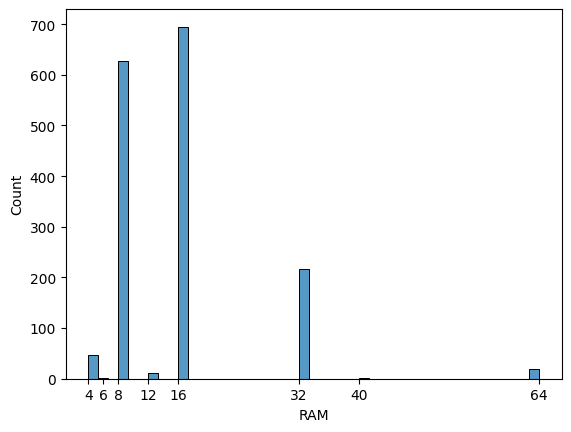

In [ ]:
# distribución de la memoria RAM
sns.histplot(data=df_train, x="RAM").set_xticks([4,6,8,12,16,32,40,64])
plt.show()

<ipython-input-14-6b5c72427bba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap='viridis', fmt='.2f')


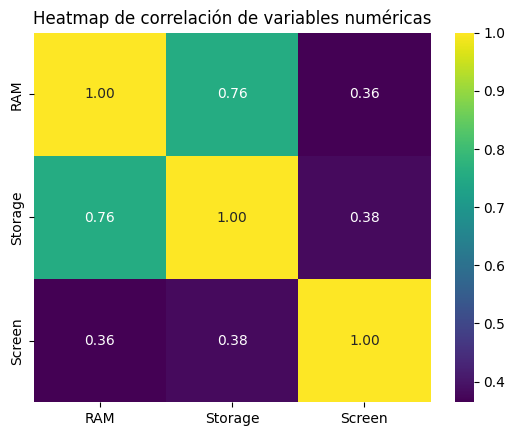

In [ ]:
# analisis de correlacion de variables numéricas
sns.heatmap(df_train.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap de correlación de variables numéricas')
plt.show()

La correlación se encuentra expresada utilizando el coeficiente de correlación de [Pearson](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), cuyos valores de correlación varían en el intervalo \[-1, 1\], donde -1 indica correlación negativa, y 1 expresa correlación positiva.

Notamos, entonces, que el atributo *Storage* tiene una correlación positiva fuerte con el atributo objetivo *RAM*, a diferencia del atributo *Screen*.

In [ ]:
# función para facilitar el conteo de frecuencias de los campos y de la variable objetivo.
def hacer_conteo(columna: str):
  conteo = pd.DataFrame(
          {
              '>=16GB': df_train[df_train['RAM'] >= 16].groupby(columna, dropna=False).size(),
              'Total': df_train.groupby(columna, dropna=False).size()
          }
      ).sort_values(by="Total", ascending=False)
  conteo['>=16GB'].fillna(0, inplace=True)
  conteo = conteo[~conteo.index.duplicated(keep='first')]
  conteo['>=16GB'] = conteo['>=16GB'].astype(int)
  return conteo

# función para graficar las frecuencias
def graficar_dist_ram_para(campo: str, xlabel: str, ylabel: str, title: str, figsize=None, width=0.35):
  df = hacer_conteo(campo)
  total_counts = df['Total']
  ram_count = df['>=16GB']

  # Tamaño del gráfico completo
  if figsize:
    plt.figure(figsize=figsize)

  x = np.arange(len(total_counts.index))  # Coordenadas x

  # barras
  plt.bar(x - width / 2, total_counts.values, width, label='Total registros')
  plt.bar(x + width / 2, ram_count.values, width, label='Registros con RAM >= 16', color='orange', alpha=0.7)

  # porcentajes
  ram_porcentaje = ram_count / total_counts * 100

  # etiquetas
  for i, v in enumerate(total_counts.values):
      plt.text(i - width / 2, v + 5, str(v), ha='center', fontsize=10)

  # Agregar etiquetas de porcentaje en las barras de ram_count
  for i, v in enumerate(ram_count.values):
      plt.text(i + width / 2, v + 5, f'{ram_porcentaje.values[i]:.2f}%', ha='center', fontsize=10)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks(x, total_counts.index)  # Etiquetas del eje x
  plt.legend()
  plt.show()

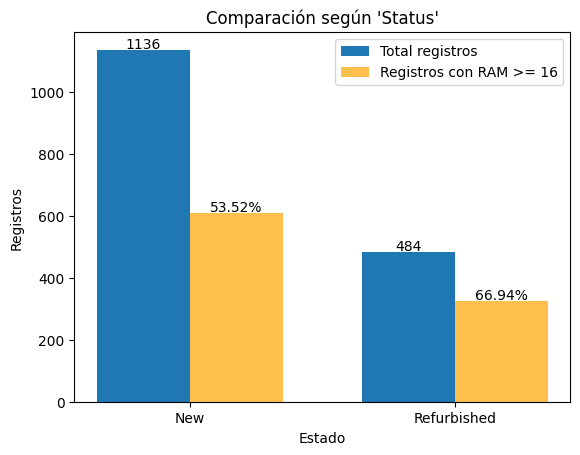

In [ ]:
# comparación según el estado de la laptop
graficar_dist_ram_para('Status', 'Estado', 'Registros', 'Comparación según \'Status\'')

In [ ]:
# revisamos el conteo de marcas
conteo_marcas = hacer_conteo('Brand')
conteo_marcas

,>=16GB,Total
Brand,,
Asus,195,302
HP,116,285
Lenovo,135,278
MSI,207,217
Acer,36,101
Apple,37,92
Dell,23,61
Microsoft,27,60
Gigabyte,39,40


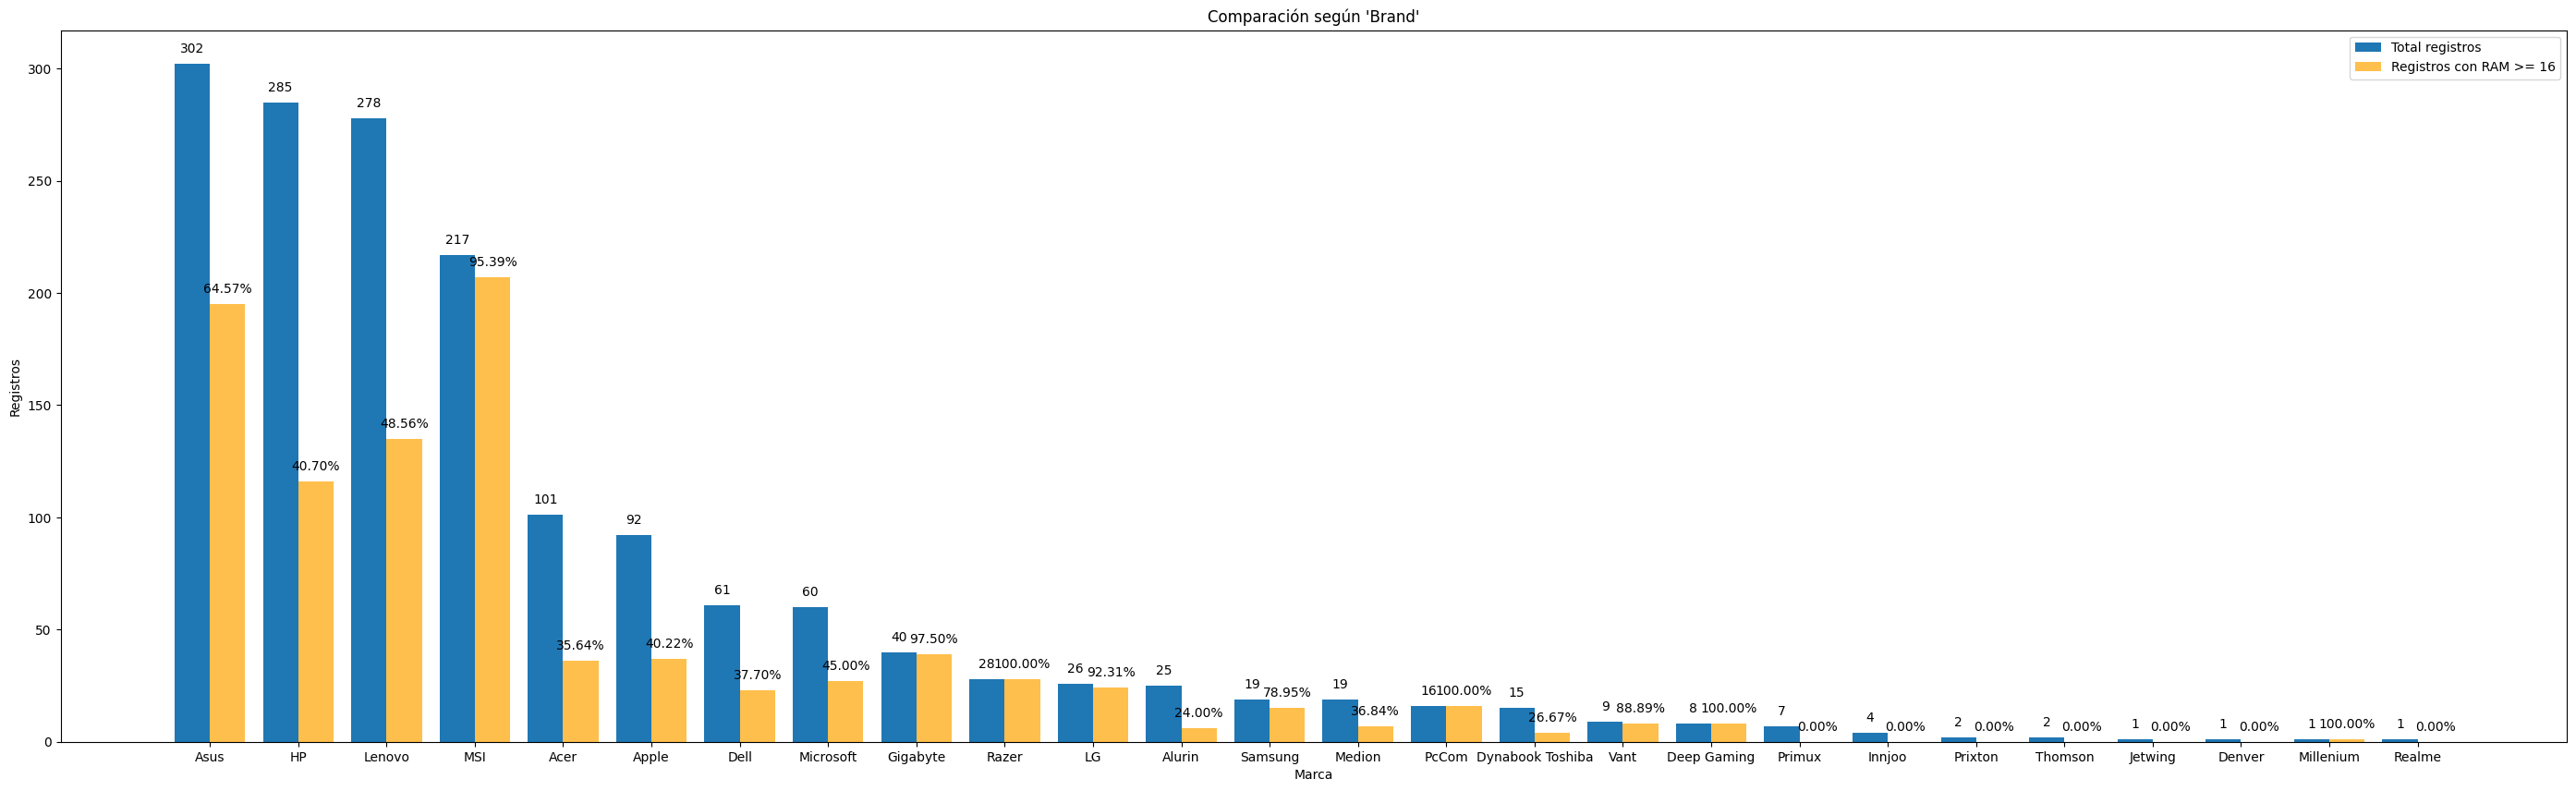

In [ ]:
# comparación de la RAM según la marca de notebook
graficar_dist_ram_para('Brand', 'Marca', 'Registros', 'Comparación según \'Brand\'', figsize=(35, 10), width=0.4)

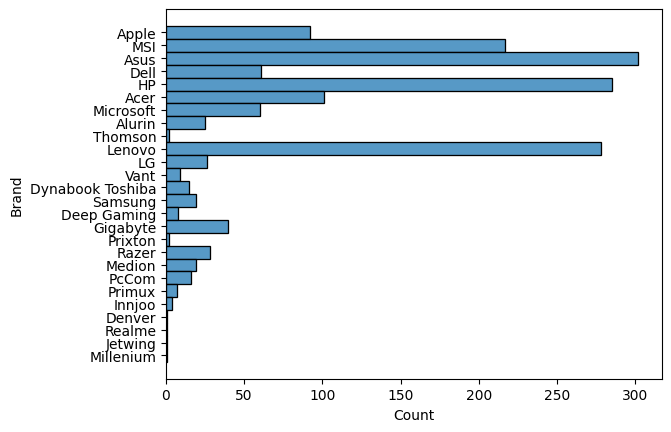

In [ ]:
# hacemos un conteo de cantidad de modelos registrados en cada marca
sns.histplot(data=df_train[['Brand']], y='Brand')
plt.show()

Notamos que algunas marcas agrupan una gran variedad de modelos de laptops.

In [ ]:
# revisamos el conteo de modelos
conteo_modelos = hacer_conteo('Model')
conteo_modelos

,>=16GB,Total
Model,,
15S,8,87
VivoBook,34,78
IdeaPad,32,77
ROG,75,75
ThinkPad,39,69
...,...,...
Deputy,1,1
ProArt,1,1
Spectre,1,1


In [ ]:
# vemos el conteo de la cantidad de marcas por modelo registrado
dist_model_brand = pd.DataFrame(data=df_train.groupby(['Model','Brand']).size().index.values.tolist(), columns=['Model','Brand'])
dist_model_brand['Model'].value_counts().head(10)

Chromebook    5
14w           2
Book          2
Go            2
250           2
Flex          2
G7            2
100e          1
ProArt        1
Prestige      1
Name: Model, dtype: int64

Notamos que existen más de una marca que tiene un modelo con el mismo nombre.



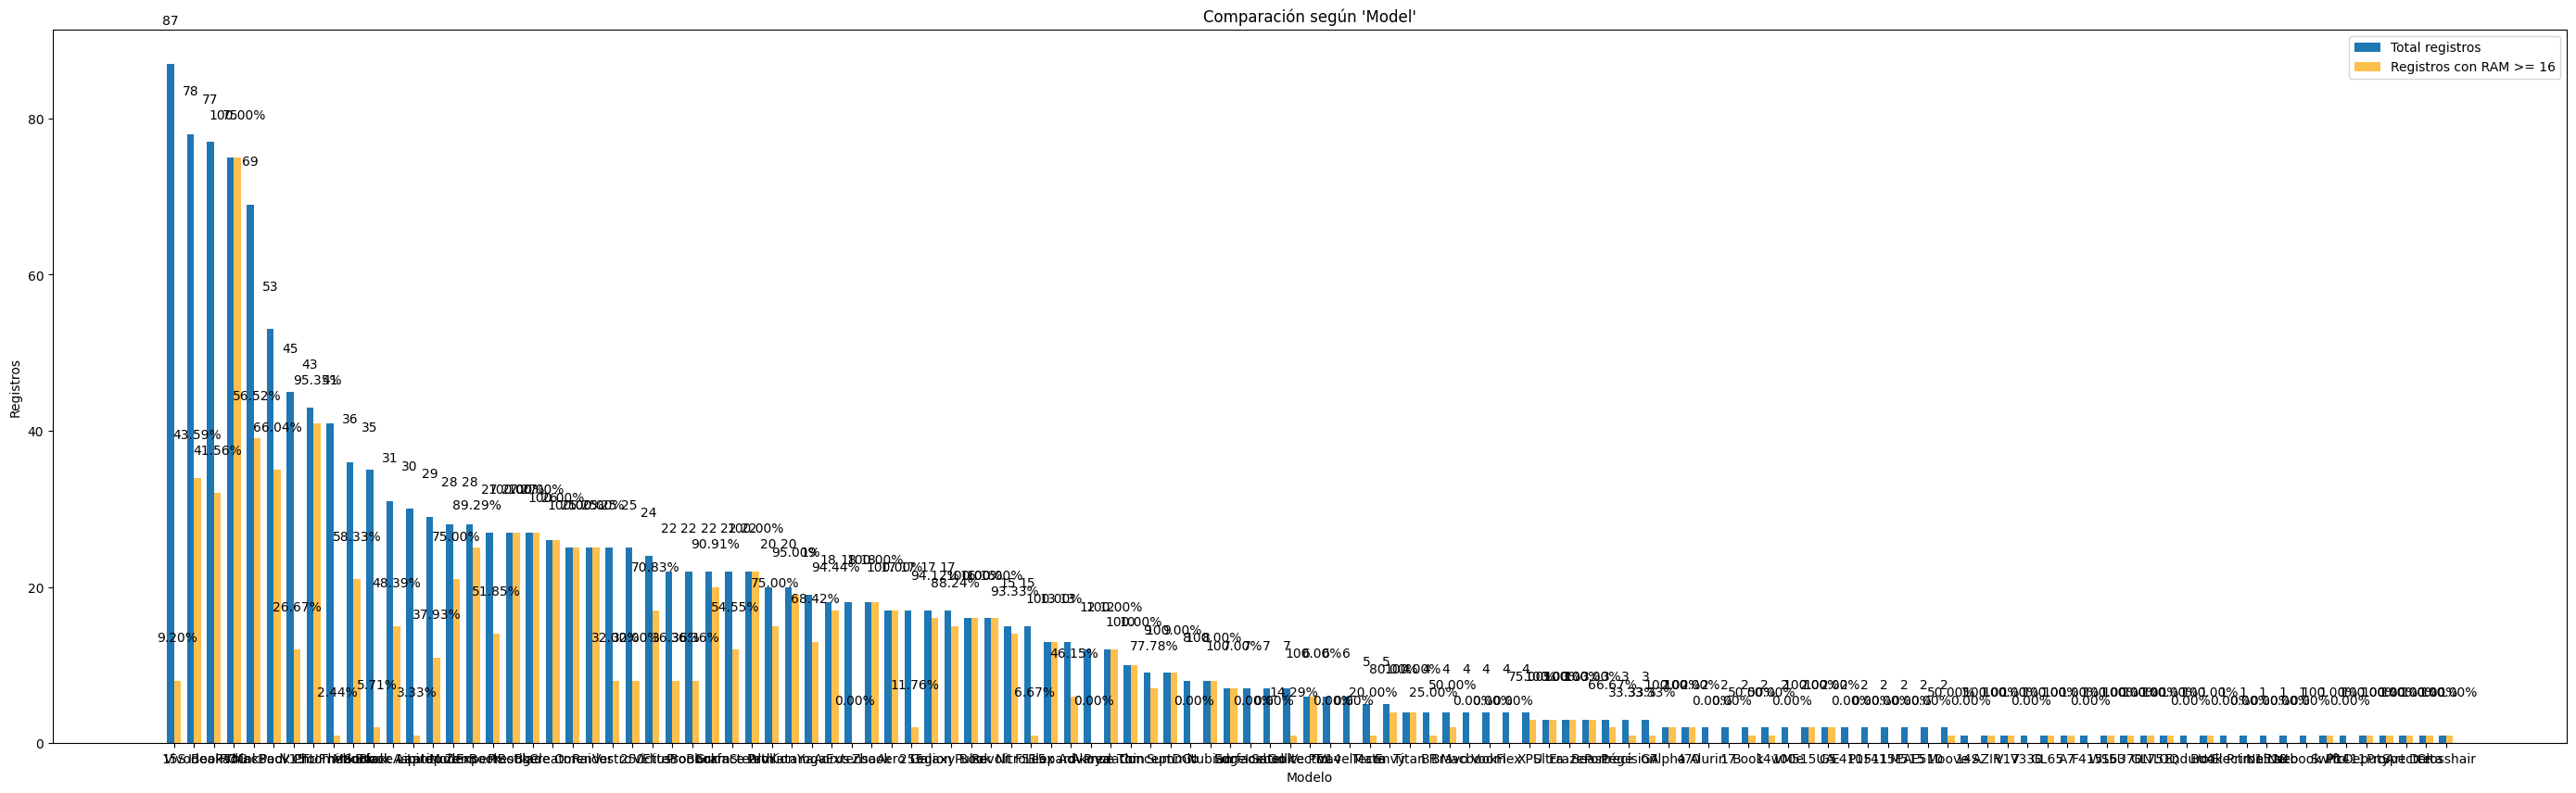

In [ ]:
# comparación de la RAM según el modelo de la notebook
graficar_dist_ram_para('Model', 'Modelo', 'Registros', 'Comparación según \'Model\'', figsize=(35, 10))

In [ ]:
# contamos los registros por tipo de almacenamiento
conteo_tipo_almacenamiento = hacer_conteo('Storage type')
conteo_tipo_almacenamiento

,>=16GB,Total
Storage type,,
SSD,928,1545
eMMC,0,38
NaN,4,37


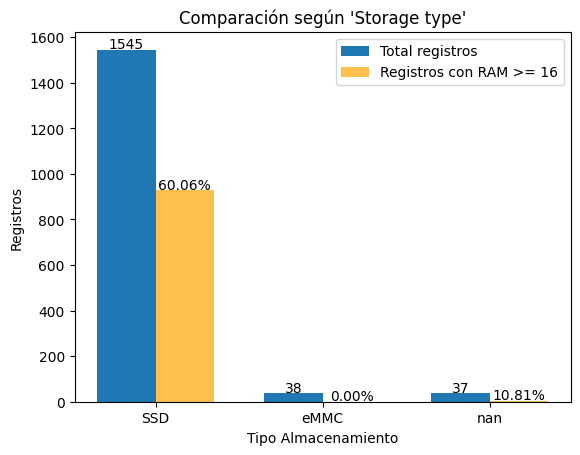

In [ ]:
# comparacion de RAM por el tipo de almacenamiento
graficar_dist_ram_para('Storage type', 'Tipo Almacenamiento', 'Registros', 'Comparación según \'Storage type\'')

Notamos que las laptops con RAM mayor o igual a 16GB se concentra en las laptops con tecnología SSD.

In [ ]:
# hacemos el conteo de frecuencias según la capacidad de almacenamiento
conteo_almacenamiento = hacer_conteo('Storage')
conteo_almacenamiento

,>=16GB,Total
Storage,,
512,452,717
1000,407,412
256,19,340
128,0,55
2000,30,30
500,22,29
64,0,23
32,0,11
0,0,1


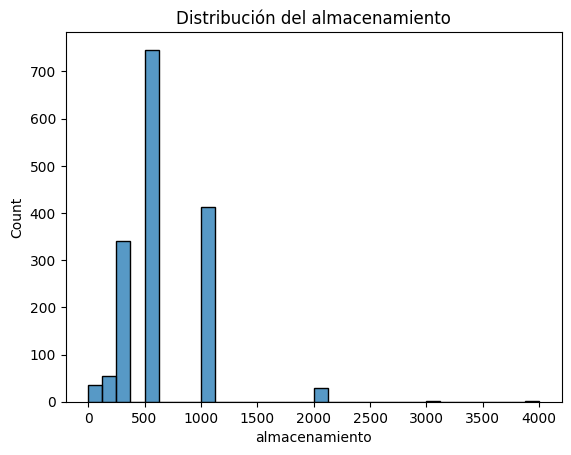

In [ ]:
# histograma de la distribución del almacenamiento
sns.histplot(data=df_train, x="Storage")
plt.xlabel('almacenamiento')
plt.ylabel('Count')
plt.title('Distribución del almacenamiento')
plt.show()

In [ ]:
# analizamos la distribución de almacenamiento de acuerdo a su tipo de almacenamiento
pd.crosstab(df_train['Storage type'], df_train['Storage'])

Storage,32,64,128,256,500,512,1000,2000,3000,4000
Storage type,,,,,,,,,,
SSD,0,0,38,328,25,711,411,30,1,1
eMMC,8,20,10,0,0,0,0,0,0,0


Vemos una clara tendencia entre los tipos de almacenamiento y la capacidad que albergan.

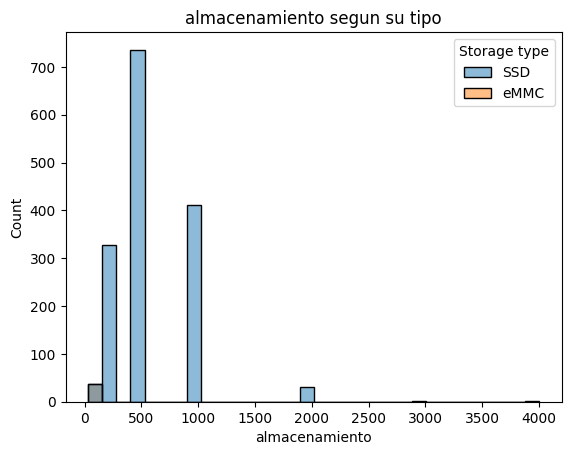

In [ ]:
# vemos la misma distribución dentro del histograma
sns.histplot(data=df_train, x="Storage", hue='Storage type')
plt.xlabel('almacenamiento')
plt.ylabel('Count')
plt.title('almacenamiento segun su tipo')
plt.show()

In [ ]:
# analizamos la distribución de almacenamiento de acuerdo a su tipo de almacenamiento
pd.crosstab(df_train['Storage type'], df_train['Status'])

Status,New,Refurbished
Storage type,,
SSD,1081,464
eMMC,34,4


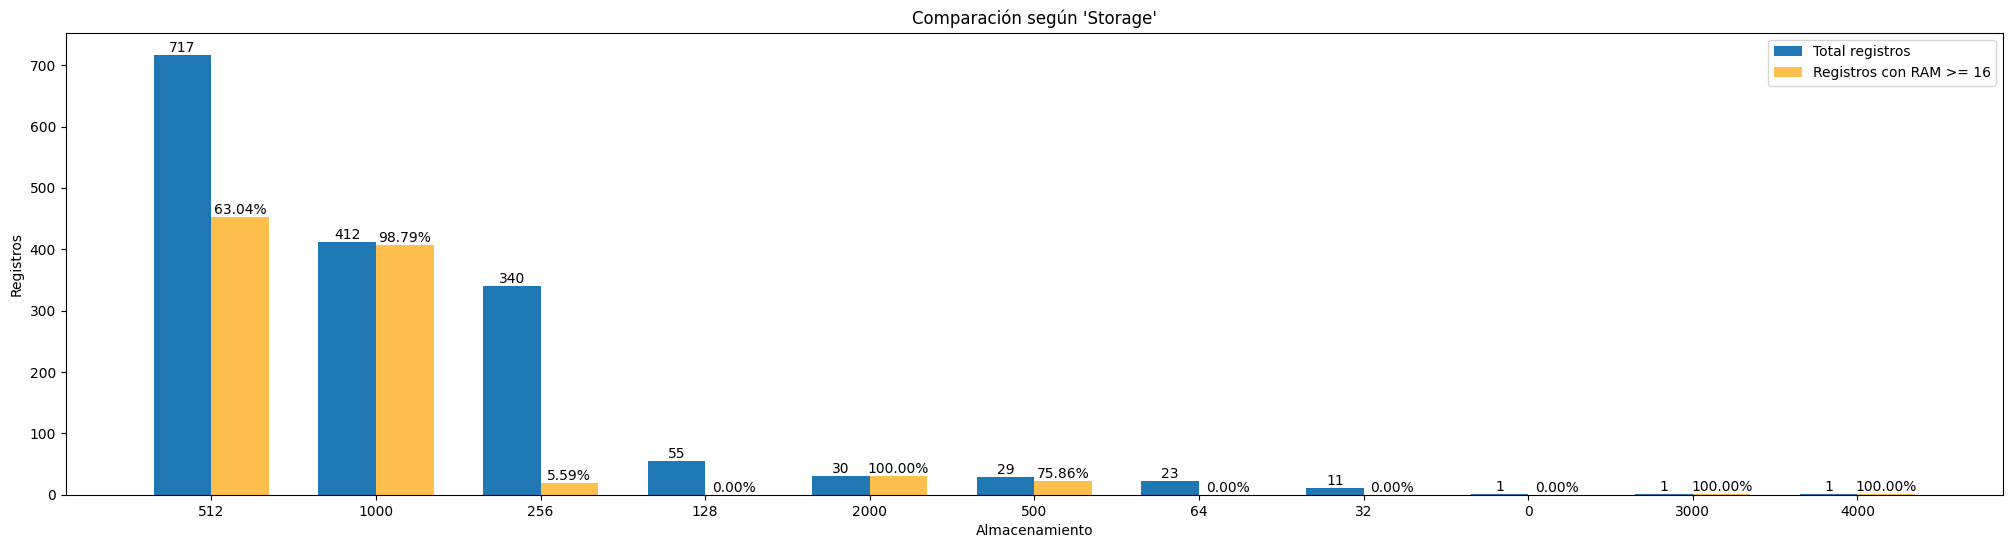

In [ ]:
# comparación según la cantidad de almacenamiento
graficar_dist_ram_para('Storage', 'Almacenamiento', 'Registros', 'Comparación según \'Storage\'', figsize=(25, 6))

In [ ]:
conteo_cpu = hacer_conteo('CPU')
conteo_cpu

,>=16GB,Total
CPU,,
Intel Core i7,472,525
Intel Core i5,136,393
AMD Ryzen 7,95,118
Intel Core i3,0,96
AMD Ryzen 5,28,94
Intel Celeron,0,71
Intel Evo Core i7,62,66
Intel Core i9,65,65
AMD Ryzen 9,37,37


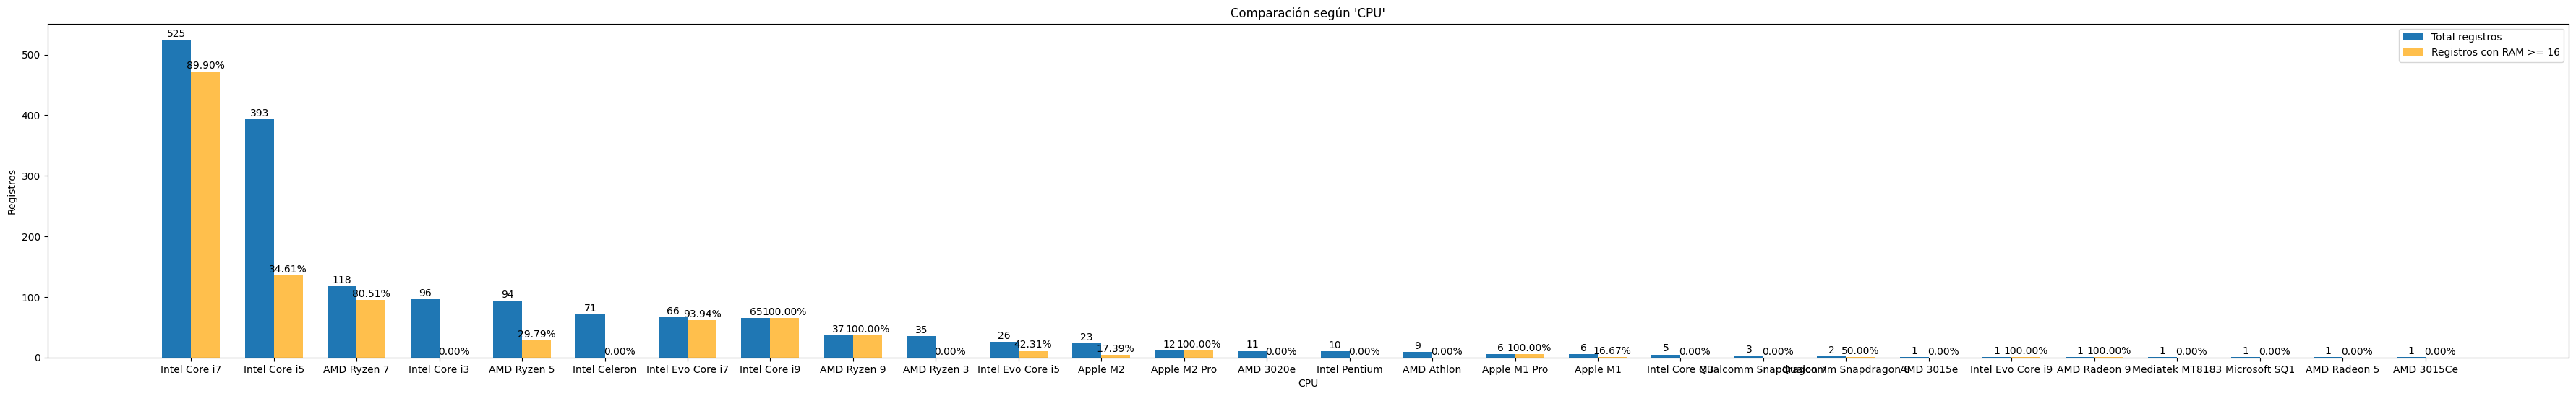

In [ ]:
# comparación según la CPU
graficar_dist_ram_para('CPU', 'CPU', 'Registros', 'Comparación según \'CPU\'', figsize=(45, 6))

In [ ]:
# hacemos el conteo de frecuencias de la GPU
conteo_gpu = hacer_conteo('GPU')
conteo_gpu

,>=16GB,Total
GPU,,
NaN,377,1039
RTX 3050,88,93
RTX 3060,85,88
RTX 3070,71,71
RTX 4060,43,44
RTX 3080,42,42
GTX 1650,30,36
RTX 4070,26,26
RTX 4050,26,26


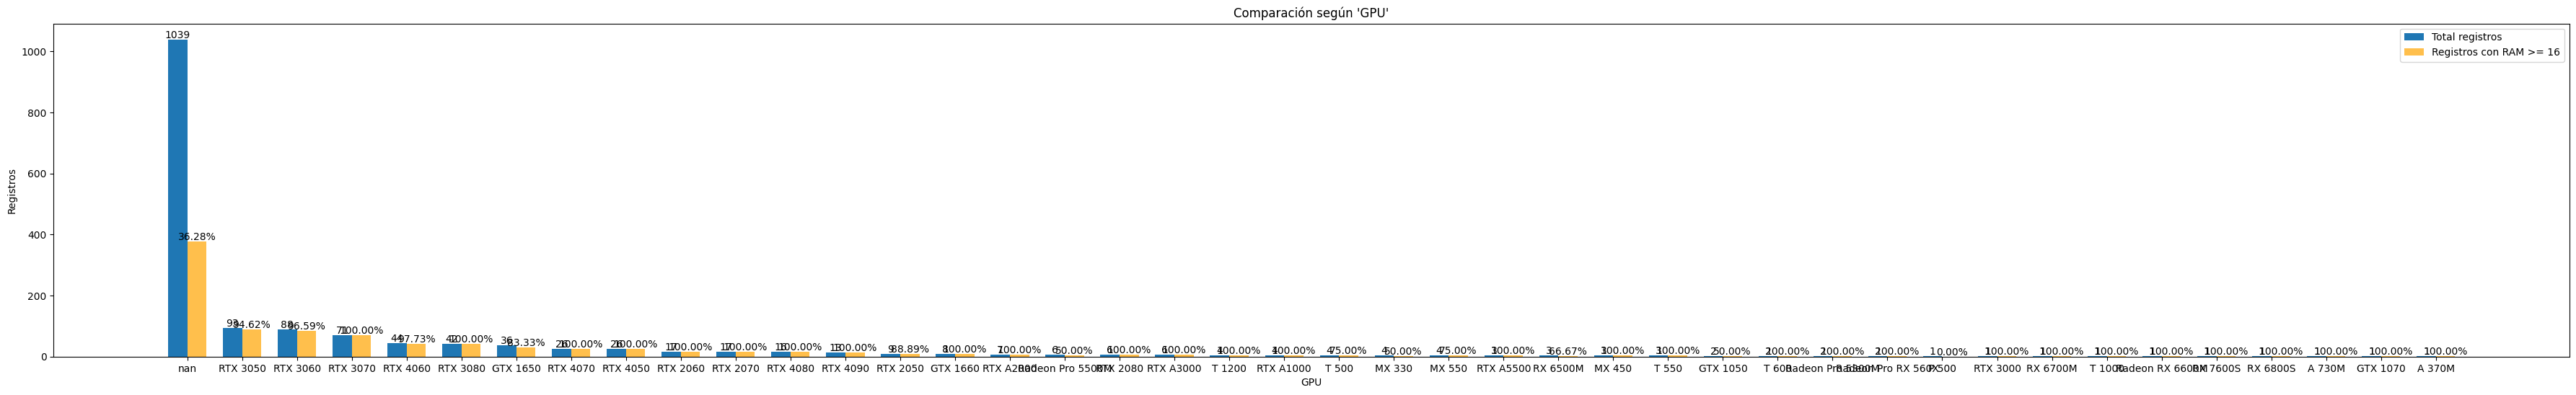

In [ ]:
# comparación por la GPU
graficar_dist_ram_para('GPU', 'GPU', 'Registros', 'Comparación según \'GPU\'', figsize=(45, 6))

In [ ]:
# realizamos el conteo sumarizando aquellos registros que poseen y no poseen GPUs
conteo_tenencia_gpu = pd.concat([conteo_gpu.loc[np.nan].to_frame(name="No Posee"),conteo_gpu.copy().drop(index=np.nan).sum().to_frame(name="Posee")], axis=1).transpose()
conteo_tenencia_gpu

,>=16GB,Total
No Posee,377,1039
Posee,555,581


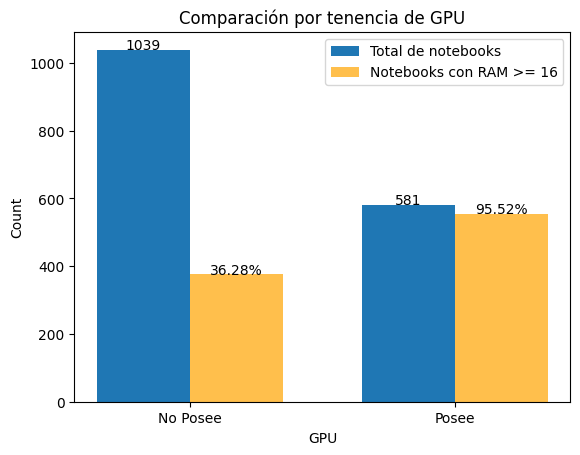

In [ ]:
# Comparamos el porcentaje de aquellas laptops que registran GPU y aquellas que no
total_counts = conteo_tenencia_gpu['Total']
ram_count = conteo_tenencia_gpu['>=16GB']

x = np.arange(len(total_counts.index))
width = 0.35
plt.bar(x - width / 2, total_counts.values, width, label='Total de notebooks')
plt.bar(x + width / 2, ram_count.values, width, label='Notebooks con RAM >= 16', color='orange', alpha=0.7)

ram_porcentaje = ram_count / total_counts * 100

for i, v in enumerate(total_counts.values):
    plt.text(i - width / 2, v + 0.5, str(v), ha='center', fontsize=10)

for i, v in enumerate(ram_count.values):
    plt.text(i + width / 2, v + 0.5, f'{ram_porcentaje.values[i]:.2f}%', ha='center', fontsize=10)

plt.xlabel('GPU')
plt.ylabel('Count')
plt.title('Comparación por tenencia de GPU')
plt.xticks(x, total_counts.index)  # Etiquetas del eje x
plt.legend()
plt.show()

Vemos que hay una gran tendencia de las laptops con GPU a tener RAM mayor o igual a 16GB.

In [ ]:
# realizamos el conteo por tamaño de pantalla
conteo_screen = hacer_conteo('Screen')
conteo_screen

,>=16GB,Total
Screen,,
15.60,379,771
14.00,154,282
16.00,113,121
17.30,112,120
13.30,37,98
16.10,29,37
17.00,27,27
13.00,6,18
15.00,11,18


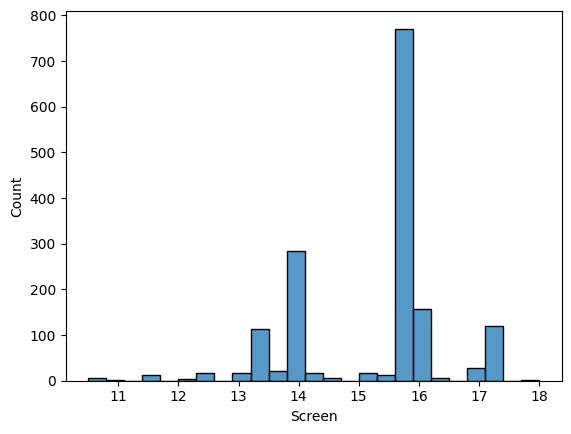

In [ ]:
# histograma de la distribución de pantallas
sns.histplot(data=df_train, x="Screen", bins=25)
plt.show()

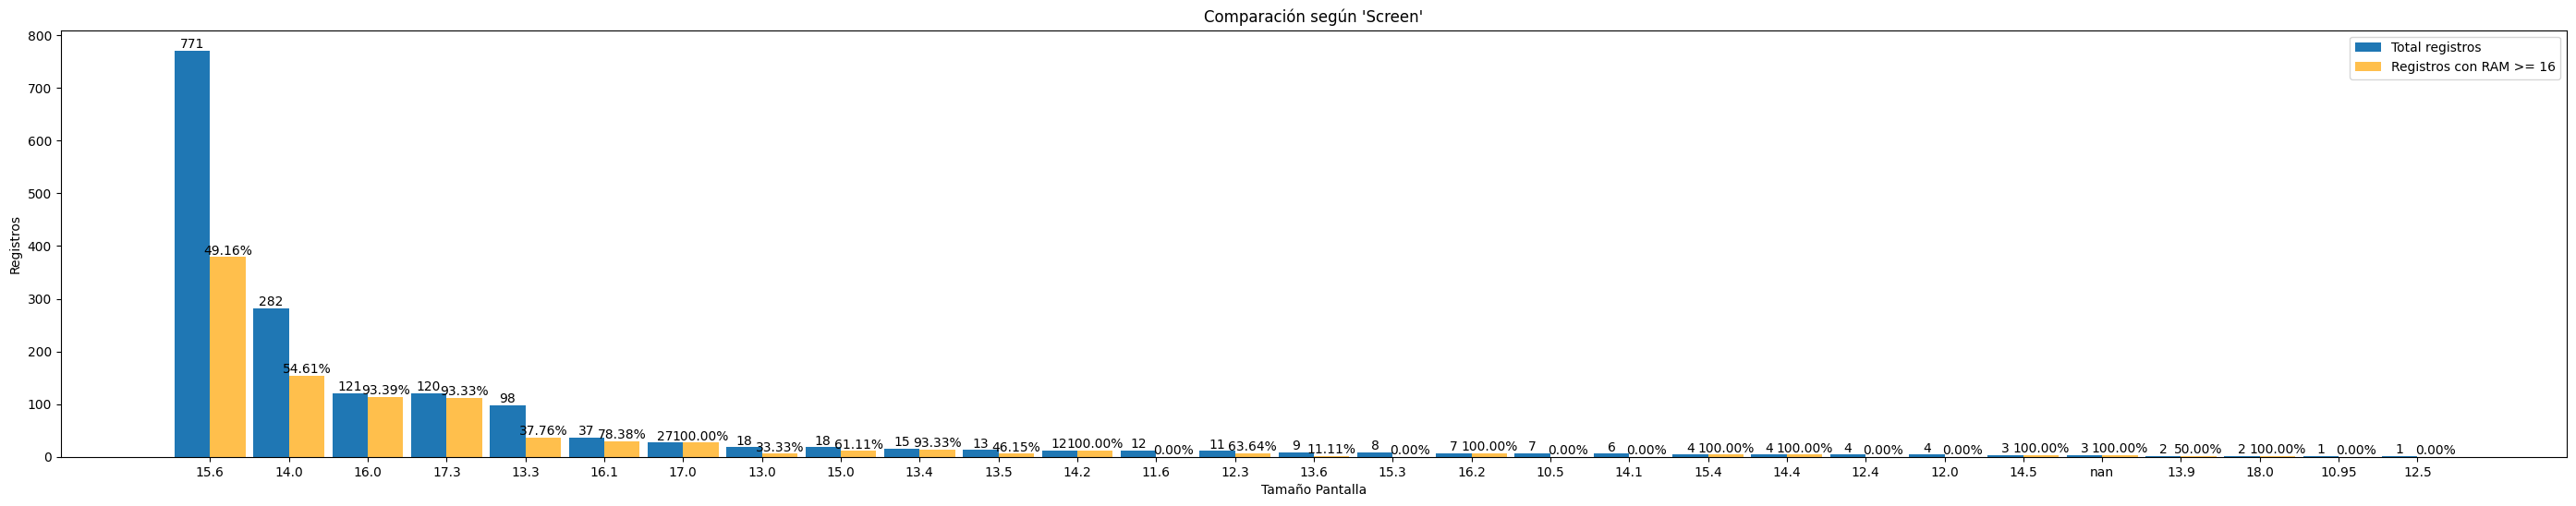

In [ ]:
# Comparamos la distribución de la variable objetivo para cada tamaño de pantalla
graficar_dist_ram_para('Screen', 'Tamaño Pantalla', 'Registros', 'Comparación según \'Screen\'', figsize=(35, 6), width=0.45)

In [ ]:
# hacemos el conteo de frecuencias según el campo Touch
conteo_touch = hacer_conteo('Touch')
conteo_touch

,>=16GB,Total
Touch,,
No,838,1453
Yes,94,167


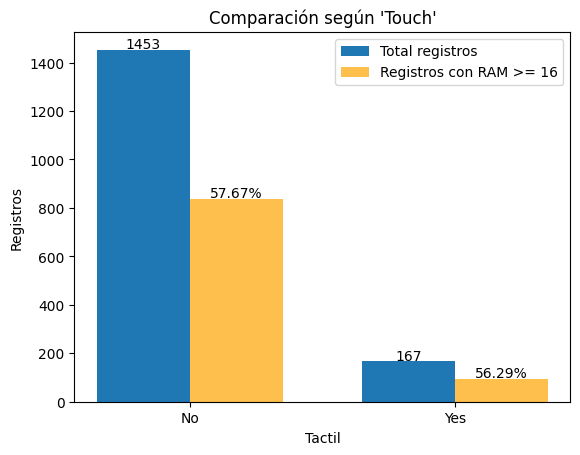

In [ ]:
# Comparación por pantalla tactil
graficar_dist_ram_para('Touch', 'Tactil', 'Registros', 'Comparación según \'Touch\'')

Vemos una distribución similar entre ambas.

#### Selección de datos de entrenamiento
Se optó por visualizar únicamente los valores que fueron separados para realizar el entrenamiento, de modo que podemos simular un trabajo real donde desconocemos los datos que el modelo procesará en un futuro, en este caso, los datos de prueba.

#### Visualización de información del dataset
Obtenemos la información del set de datos mediante `df_train.info()` para tener un primer vistazo general de nuestro set de datos, los tipos de datos con los que estamos trabajando y la cantidad de datos con los que disponemos. Los campos de tipo `object` nos indican variables categóricas, mientras que los campos de tipo `int64` y `float64` nos indican variables numéricas.

#### Visualización de datos estadísticos de las variables numéricas
Utilizamos la función `df_train.describe()` que nos facilita la obtención de valores estadísticos descriptivos de nuestras variables numéricos a modo de analizar la distribución de la media, la desviación y los cuartiles. Podemos concluir con los resultados de la función que las variables *RAM*, *Storage* y *Screen* trabajan en diferentes escalas de magnitud y distribución, anticipando la conveniencia a rescalado y normalización de datos.

##### Tablas y gráficos de conteo de frecuencias de campos
Hemos realizado tablas de conteos que nos permiten conocer rápidamente la frecuencia de cada valor para cada campo del set de datos, así como las subcantidades que cumplen con la condición.

Los **histogramas** nos permiten ver la distribución de frecuencia de las variables numéricas y la variable objetivo

Los **gráficos de barra** nos sirven para visualizar y comparar, entre las distintas categorías, la forma en la que cada una se asocia a la variable objetivo.

Las **gráficas de calor** nos permite conocer el nivel de correlacción existente entre las variables numéricas y la variable objetivo.


## Imputación de valores faltantes

In [ ]:
# revisamos los valores estadísticos del almacenamiento de tipo eMMC
df_train[df_train['Storage type'] == 'eMMC']['Storage'].describe()

count     38.000000
mean      74.105263
std       34.979368
min       32.000000
25%       64.000000
50%       64.000000
75%      112.000000
max      128.000000
Name: Storage, dtype: float64

In [ ]:
# completar los datos de tipo de almacenamiento
def completar_storage_type(row):
    if pd.isna(row['Storage type']):
        if row['Storage'] <= 68:
            return 'eMMC'
        return 'SSD'
    else:
        return row['Storage type']

# Modificar la columna 'Storage type'
df_train['Storage type'] = df_train.apply(completar_storage_type, axis=1)
df_test['Storage type'] = df_test.apply(completar_storage_type, axis=1)

In [ ]:
# revisamos la distribución resultante según nuestra variable objetivo
conteo_tipo_almacenamiento = hacer_conteo('Storage type')
conteo_tipo_almacenamiento

,>=16GB,Total
Storage type,,
SSD,932,1575
eMMC,0,45


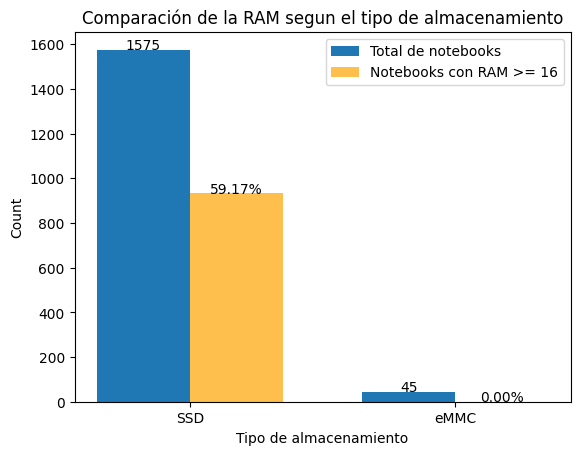

In [ ]:
# volvemos a graficar para ver la distribución resultante
conteo_tipo_almacenamiento = hacer_conteo('Storage type')
total_counts = conteo_tipo_almacenamiento['Total']
ram_count = conteo_tipo_almacenamiento['>=16GB']

# barras
x = np.arange(len(total_counts.index))
width = 0.35
plt.bar(x - width / 2, total_counts.values, width, label='Total de notebooks')
plt.bar(x + width / 2, ram_count.values, width, label='Notebooks con RAM >= 16', color='orange', alpha=0.7)

# porcentajes
ram_porcentaje = ram_count / total_counts * 100

# etiquetas
for i, v in enumerate(total_counts.values):
    plt.text(i - width / 2, v + 0.5, str(v), ha='center', fontsize=10)

for i, v in enumerate(ram_count.values):
    plt.text(i + width / 2, v + 0.5, f'{ram_porcentaje.values[i]:.2f}%', ha='center', fontsize=10)

plt.xlabel('Tipo de almacenamiento')
plt.ylabel('Count')
plt.title('Comparación de la RAM segun el tipo de almacenamiento')
plt.xticks(x, total_counts.index)  # Etiquetas del eje x
plt.legend()
plt.show()


In [ ]:
# Completamos las GPUs faltantes
def completar_GPU(row):
    if pd.isna(row['GPU']):
        return 'No Posee'
    else:
        return row['GPU']

df_train['GPU'] = df_train.apply(completar_GPU, axis=1)
df_test['GPU'] = df_test.apply(completar_GPU, axis=1)

In [ ]:
# revisamos la moda del atributo Screen
print(df_train['Screen'].mode())

0    15.6
Name: Screen, dtype: float64


In [ ]:
# completamos los datos utilizando la moda
df_train['Screen'] = df_train['Screen'].fillna(df_train['Screen'].mode().iloc[0])
df_test['Screen'] = df_test['Screen'].fillna(df_train['Screen'].mode().iloc[0])

In [ ]:
# revisar nuevamente el conteo de valores
df_train.count()

Laptop          1620
Status          1620
Brand           1620
Model           1620
CPU             1620
RAM             1620
Storage         1620
Storage type    1620
GPU             1620
Screen          1620
Touch           1620
dtype: int64

Limitándonos al set de datos que poseemos para la realización de este trabajo, hemos encontrado que los campos que tienen posibles datos vacíos han sido:
- Storage Type
- GPU
- Screen

Por esta razón, tomamos como decisión que, para el preprocesado de datos futuros, será obligatorio que el resto de campos se encuentren debidamente completados a fin del correcto funcionamiento de los modelos propuestos.

Respecto a la variable **Storage type**, debido a las limitaciones del set de datos actual, solo contemplamos dos posibles valores: *SSD* y *eMMC*. En un futuro, si quisieramos contemplar otro tipo de almacenamiento (por ejemplo, *HDD* o diferentes tipos de SSD como *SSD M.2*) tendremos que hacer una recolección de muestras sobre la que podamos diseñar y entrenar al modelo.

Como se ha evaluado en la etapa de exploración de los datos, el umbral entre los tipos de almacenamiento se puede visualizar entre los 64 y 128 GB de capacidad. La media de la capacidad de Laptops de tipo *eMMC* es aproximadamente 68 GB, así que se optó por usarlo como umbral para completar valores faltantes:
- Si la capacidad de almacenamiento es menor o igual a 68GB, se asumirá que es de tipo *eMMC*.
- Se asumirá el valor *SSD* en el caso contrario.

Para el caso de la variable **GPU**, se asume que los valores faltantes NA implican que la laptop no poseen una GPU, por lo que se crea la categoria "No Posee"

Por ultimo para la variable **Screen**, se optó por reemplazar los valores NA por la moda, debido a que a la hora de graficar en el histograma la distribución de valores, se apreció que la media en este caso no es un valor muy representativo al no asemejarse el grafico a una distribución normal, por lo que en este caso se utilizó la moda

## Extracción de características

Elección de atributos, reducción de la dimensión, creación de nuevos atributos y/o lo que consideren necesario.

In [ ]:
# Eliminamos las variables 'Laptop' y 'Model
df_train = df_train.drop('Laptop',axis=1)
df_test = df_test.drop('Laptop',axis=1)

df_train = df_train.drop('Model',axis=1)
df_test = df_test.drop('Model',axis=1)

df_train = df_train.drop('Touch',axis=1)
df_test = df_test.drop('Touch',axis=1)

print("Shape datos train: ", df_train.shape, sep="")
print(df_train.head(5))
print("Shape datos test: ", df_test.shape, sep="")
print(df_test.head(5))

Shape datos train: (1620, 8)
           Status  Brand            CPU  RAM  Storage Storage type       GPU  \
1069  Refurbished  Apple  Intel Core i5   16      512          SSD  No Posee   
2031  Refurbished    MSI  Intel Core i7   16      512          SSD  RTX 3060   
1811  Refurbished   Asus    AMD Ryzen 7   16     1000          SSD  RTX 3070   
1346          New   Dell  Intel Core i7   16     1000          SSD  RTX 3050   
1403          New     HP  Intel Core i5    8      512          SSD  No Posee   

      Screen  
1069    13.3  
2031    17.3  
1811    15.6  
1346    15.6  
1403    15.6  
Shape datos test: (540, 8)
   Status   Brand            CPU  RAM  Storage Storage type       GPU  Screen
2     New    Asus  Intel Core i3    8      256          SSD  No Posee    15.6
3     New     MSI  Intel Core i7   16     1000          SSD  RTX 3050    15.6
5     New     MSI  Intel Core i7   32     1000          SSD  RTX 4060    17.3
6     New  Lenovo    AMD Ryzen 5    8      256          SSD  

In [ ]:
# Pasar los valores de GPU a 'Si posee' o 'No Posee'
df_train['GPU'] = df_train['GPU'].apply(lambda x: 'Si Posee' if x != 'No Posee' else x)
df_test['GPU'] = df_test['GPU'].apply(lambda x: 'Si Posee' if x != 'No Posee' else x)

print(df_train.head(5))

           Status  Brand            CPU  RAM  Storage Storage type       GPU  \
1069  Refurbished  Apple  Intel Core i5   16      512          SSD  No Posee   
2031  Refurbished    MSI  Intel Core i7   16      512          SSD  Si Posee   
1811  Refurbished   Asus    AMD Ryzen 7   16     1000          SSD  Si Posee   
1346          New   Dell  Intel Core i7   16     1000          SSD  Si Posee   
1403          New     HP  Intel Core i5    8      512          SSD  No Posee   

      Screen  
1069    13.3  
2031    17.3  
1811    15.6  
1346    15.6  
1403    15.6  


In [ ]:
# Agrupar datos categoricos de baja frecuencia
columns = ['CPU', 'Brand', 'Screen']
for col in columns:
    frecuencia = df_train[col].value_counts()

    # Identificar categorías con frecuencia menor a 50, quiza no es lo mejor para todas las variables
    # habria que analizar la proporcion en base a la distribucion de estas 5 columnas
    # Para el GPU conviene dividir en tiene y no tiene
    # Para el CPU simplemente agrupar en "otros"
    # Para el Almcaneamiento notese que los >512 siempre tienen ram >16, 512 tienen la mitad, y los <512 tienen poca ram
    categorias_baja_frec = frecuencia[frecuencia < 30].index
    categorias = df_train[col].unique()
    categorias_unicas = categorias.astype(str)

    # Reemplazar esas categorías con "Otros"
    df_train[col] = df_train[col].apply(lambda x: 'Otros' if x in categorias_baja_frec else x)
    df_test[col] = df_test[col].apply(lambda x: 'Otros' if x in categorias_baja_frec else x)
    df_test[col] = df_test[col].apply(lambda x: x if x in categorias else 'Otros')
    print(f'Valores distintos del campo \'{col}\'\t: {len(df_train[col].unique())}')

Valores distintos del campo 'CPU'	: 11
Valores distintos del campo 'Brand'	: 10
Valores distintos del campo 'Screen'	: 7


<ipython-input-52-5c07df2db200>:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df_test[col] = df_test[col].apply(lambda x: x if x in categorias else 'Otros')


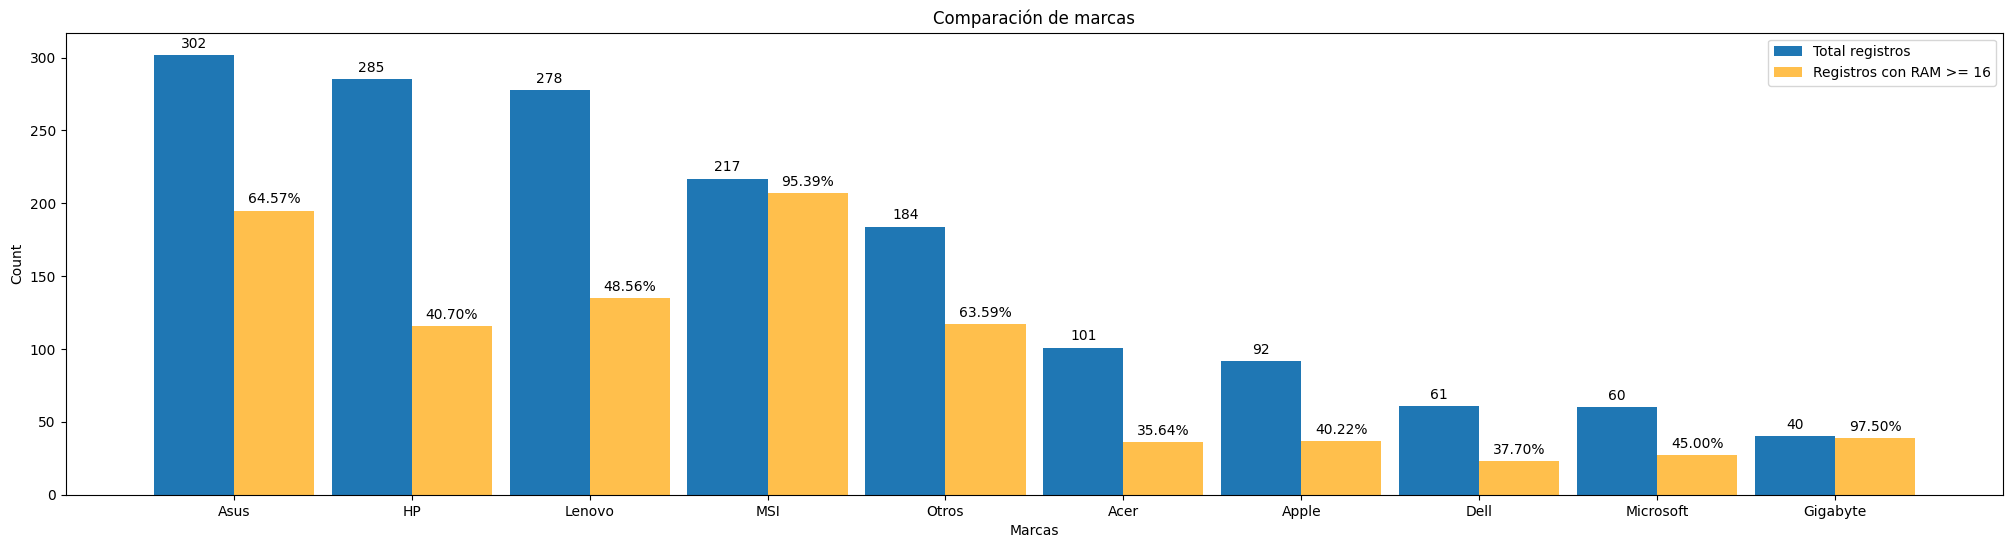

In [ ]:
graficar_dist_ram_para('Brand', 'Marcas', 'Count', 'Comparación de marcas', figsize=(25,6), width=0.45)

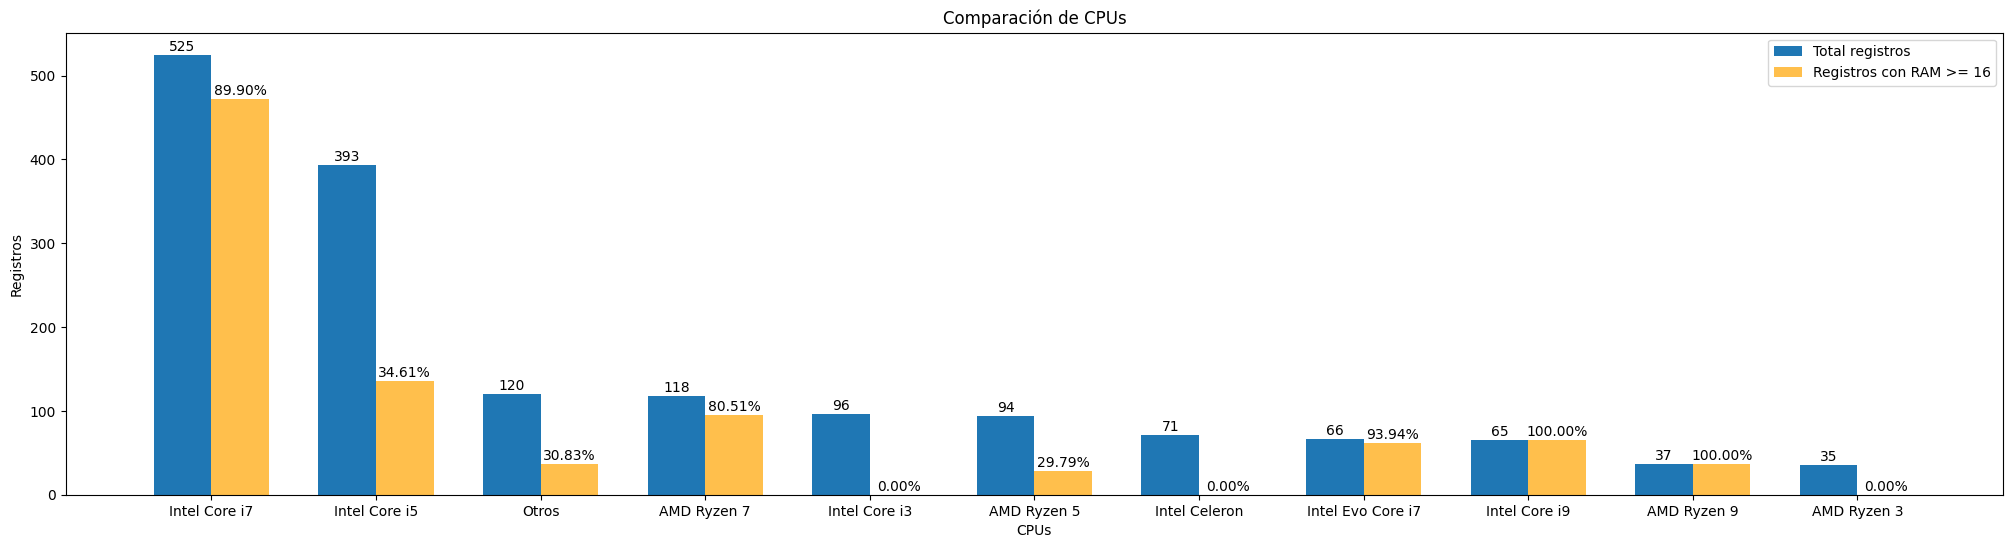

In [ ]:
graficar_dist_ram_para('CPU', 'CPUs', 'Registros', 'Comparación de CPUs', figsize=(25,6))

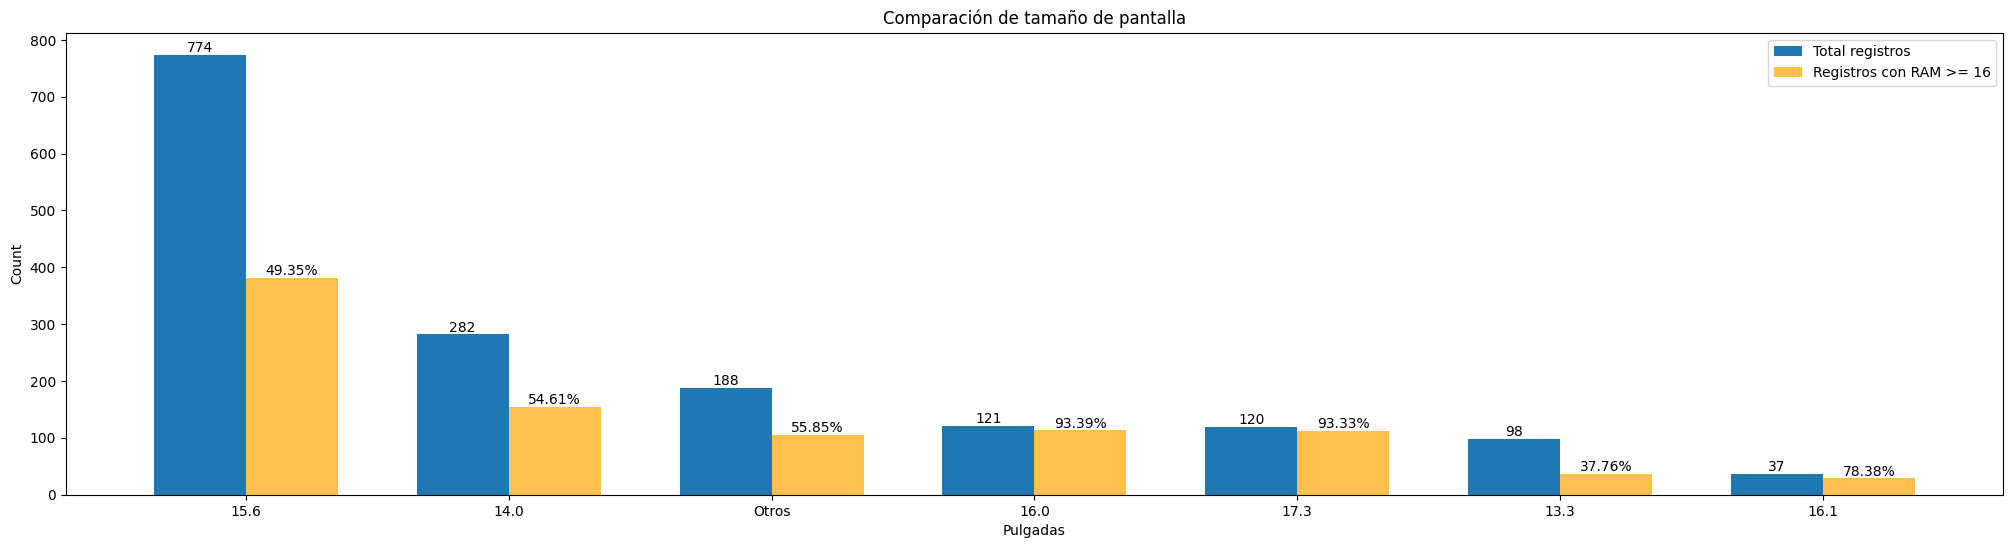

In [ ]:
graficar_dist_ram_para('Screen', 'Pulgadas', 'Count', 'Comparación de tamaño de pantalla', figsize=(25,6))

Se descarta el atributo **Laptop** por ser un recopilado resumido de los datos que poseen el resto de los campos de cada registro.

Se descarta el atributo **Model** al considerarse un atributo redundante frente al uso de la variable **Brand**. Además, según lo que hemos observado durante la exploración de los datos, los modelos no poseen correspondencia directa a una sola marca, por lo que dos laptos del mismo modelo no tendrán necesariamente las mismas características.

Se descarta el atributo **Touch** ya que se descubrió, duranto el análisis explorativo, que su valor no tiene variación significativa en la variable objetivo.

Para el caso de la *CPU*, *GPU*, *Model*, *Brand* y *Screen*, se observó que hay ciertas categorias dentro de cada una de estas marca que tienen una frecuencia de aparición muy baja, por lo que se creará la siguiente regla: Si hay alguna categoria con una frecuencia de aparicion mmenor a 15, esta entrará dentro de la nueva categoria **Otros**

Con esta nueva regla, se perdera informacion con relacion a estas categorias, pero el modelo generalizará mucho mejor gracias a la reducción de la dimensionalidad que lograremos durante la codificación, ya que sino pueden haber problemas a la hora de comparar el set de entrenamiento y testeo al usar codificacion one-hot, y tambien problemas de sobreajuste  


## Codificación de variables categóricas

In [ ]:
# listado de columnas con valores categoricos
columns = ["Status", "Brand", "CPU", "Storage type", "GPU", "Screen"]

# touchs = pd.get_dummies(df_train['Touch'], prefix="Touch", prefix_sep='_')

df_train_cod = df_train.copy()
df_test_cod = df_test.copy()

for column in columns:

  # datos de entrenamiento codificados
  df_train_cod = pd.concat([
      df_train_cod,
      pd.get_dummies(
          df_train[column],
          prefix=column.replace(' ', ''),
          prefix_sep='_')],
          axis=1)
  df_train_cod.drop(columns=[column], inplace=True)

  # datos de prueba codificados
  df_test_cod = pd.concat([
      df_test_cod,
      pd.get_dummies(
          df_test[column],
          prefix=column.replace(' ', ''),
          prefix_sep='_')],
          axis=1)
  df_test_cod.drop(columns=[column], inplace=True)


In [ ]:
# codificación de la RAM
def codificar_RAM(row):
    if row['RAM'] >= 16:
        return 1
    return 0

df_train_cod['RAM'] = df_train_cod.apply(codificar_RAM, axis=1)
df_test_cod['RAM'] = df_test_cod.apply(codificar_RAM, axis=1)
print(df_train_cod['RAM'].value_counts())

1    932
0    688
Name: RAM, dtype: int64


In [ ]:
# aca vemos la nueva cantidad de columnas
print(df_train_cod.shape)

(1620, 36)


In [ ]:
# visualizar el resultado
print(df_train_cod.head(1))

      RAM  Storage  Status_New  Status_Refurbished  Brand_Acer  Brand_Apple  \
1069    1      512           0                   1           0            1   

      Brand_Asus  Brand_Dell  Brand_Gigabyte  Brand_HP  ...  Storagetype_eMMC  \
1069           0           0               0         0  ...                 0   

      GPU_No Posee  GPU_Si Posee  Screen_13.3  Screen_14.0  Screen_15.6  \
1069             1             0            1            0            0   

      Screen_16.0  Screen_16.1  Screen_17.3  Screen_Otros  
1069            0            0            0             0  

[1 rows x 36 columns]


In [ ]:
print(df_test_cod.head(1))

   RAM  Storage  Status_New  Status_Refurbished  Brand_Acer  Brand_Apple  \
2    0      256           1                   0           0            0   

   Brand_Asus  Brand_Dell  Brand_Gigabyte  Brand_HP  ...  Storagetype_eMMC  \
2           1           0               0         0  ...                 0   

   GPU_No Posee  GPU_Si Posee  Screen_13.3  Screen_14.0  Screen_15.6  \
2             1             0            0            0            1   

   Screen_16.0  Screen_16.1  Screen_17.3  Screen_Otros  
2            0            0            0             0  

[1 rows x 36 columns]


Los campos *Status*, *Brand*, *CPU*, *Storage type*, *GPU* y *Screen* se codifican usando el método OneHot, ya que los consideramos variables categóricas nominal y, por lo tanto, es recomendable tratarlos de forma separada sin crear un orden jerárquico entre sus posbiles valores.

En cuanto a nuestra variable objetivo **RAM**, se codifica utilizando dos valores posibles:
- 0 para valores menores a 16GB.
- 1 para valorse iguales o mayores a 16GB.

Esto se realiza con el fin de facilitar el uso de algoritmos de aprendizaje utilizando entradas numéricas válidas para la clasificación adecuada. A la vez que también facilita el calculo de métricas como la precisión, la sensibilidad o la especificidad

## Escalado, estandarizado o normalización

In [ ]:
# revisamos los datos de Storage
df_train_cod['Storage'].describe()

count    1620.000000
mean      590.437037
std       360.784892
min         0.000000
25%       256.000000
50%       512.000000
75%      1000.000000
max      4000.000000
Name: Storage, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Se normalizará el almacenamiento
c_storage_train = df_train_cod['Storage'].values.reshape(-1, 1)
c_storage_test = df_test_cod['Storage'].values.reshape(-1, 1)

# StandardScaler para escalar
std_scaler = StandardScaler()
std_scaler.fit(c_storage_train)

# reemplazo
df_train_cod['Storage'] = std_scaler.transform(c_storage_train)
df_test_cod['Storage'] = std_scaler.transform(c_storage_test)

print("Media de 'Storage':", df_train_cod['Storage'].mean())
print("Desviación estándar de 'Storage':", df_train_cod['Storage'].std())

Media de 'Storage': -2.741291418827547e-17
Desviación estándar de 'Storage': 1.000308784938655


In [ ]:
# revisamos los datos normalizados
df_train_cod['Storage'].describe()

count    1.620000e+03
mean    -2.741291e-17
std      1.000309e+00
min     -1.637040e+00
25%     -9.272570e-01
50%     -2.174738e-01
75%      1.135550e+00
max      9.453322e+00
Name: Storage, dtype: float64

El campo `Storage` es la única característica numérica que utilizaremos como entrada para los modelos. Como se puede ver en la descripción de los datos del campo, posee un orden de magnitud mayor al del resto de variables, por lo que hemos optado por reescalar utilizando `StandardScaler`, el cual nos permite ajustarlo a una escala común de media 0 y desviación 1.

De esta manera nos aseguramos que las distintas magnitudes manejadas en los campos de entrada no influyan de forma neativa durante el entrenamiento de los modelos y se mantengan sus proporciones a escalas similares.

# Clasificación

Utilizar por lo menos dos técnicas de clasificación

## 1er Técnica: Clasificación Lineal

### Ajuste de parámetros

In [ ]:
# calculo de los pesos
from sklearn.linear_model import LinearRegression

datos_tmp = df_train_cod.copy()

y_train = datos_tmp.pop('RAM').to_numpy()
x_train = datos_tmp.to_numpy()

del datos_tmp

reg_lineal = LinearRegression()
# reg.fit(data, target)
reg_lineal.fit(x_train, y_train)

print(f'Pesos calculados:\n{reg_lineal.coef_}\n') # los pesos calculados
print(f'Término independiente:\n{reg_lineal.intercept_}') # el termino independiente del aumento

Pesos calculados:
[ 1.13867531e-01  1.22328113e+13  1.22328113e+13 -1.96103030e+12
 -1.96103030e+12 -1.96103030e+12 -1.96103030e+12 -1.96103030e+12
 -1.96103030e+12 -1.96103030e+12 -1.96103030e+12 -1.96103030e+12
 -1.96103030e+12  9.92758664e+12  9.92758664e+12  9.92758664e+12
  9.92758664e+12  9.92758664e+12  9.92758664e+12  9.92758664e+12
  9.92758664e+12  9.92758664e+12  9.92758664e+12  9.92758664e+12
  6.42501995e+11  6.42501995e+11  1.18685001e+11  1.18685001e+11
  2.97417036e+12  2.97417036e+12  2.97417036e+12  2.97417036e+12
  2.97417036e+12  2.97417036e+12  2.97417036e+12]

Término independiente:
-23934725000271.457


En esta sección se procedio a separar la variable objetivo del resto de variables en el set de entrenamiento. Se eligió en este caso como como primer modelo un clasificador lineal ya que al ser la variable objetivo una salida binaria, este algoritmo debería ser capaz de separar linealmente estas 2 clases sin problema alguno

Lo que hace este algoritmo, es calcular una funcion lineal que se ajuste de mejor manera a los datos de entrenamiento, minimizando el error cuadratico, mediante lo que se conoce como una regresión lineal.

### Predicción

In [ ]:
# procesamos los datos de prueba
x_test = df_test_cod.copy().drop(columns=['RAM']).to_numpy()
y_test = df_test_cod.copy().pop('RAM').to_numpy()
y_predict_cl = reg_lineal.predict(x_test)

# lo pasamos por un umbral de 0.5 para transformar la salida en binario
y_predict_cl = (y_predict_cl > 0.5).astype(int)


In [ ]:
# salida el modelo de regresión lineal
print(y_predict_cl)

[0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0
 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 0 

En este caso se procedió a probar el clasificador lineal ya entrenado con los datos de test, con el fin de poder probar luego su precisión en cuando a las predicciones. Cabe aclarar que el algoritmo no arroja valores 0 o 1 como predicción, ya que es una regresión lineal. Para que sea estrictamente un clasificador lineal se codifican los valores predichos de la siguiente forma
- 0 para valores predichos menores o iguales a 0.5
- 1 para valores predichos mayores a 0.

Estos valores deben ser si o si codificados para este caso, ya que la variable objetivo es una categoria que puede tomar solo 2 valores

### Análisis de Importancia de Características

In [ ]:
# revisamos el intervalo de valores de los pesos
print(f'[{reg_lineal.coef_.min()} - {reg_lineal.coef_.max()}]')

[-1961030296415.7412 - 12232811295407.264]


Los pesos se han ajustados en magnitudes muy altas, en el orden de los 13 a 15 dígitos.

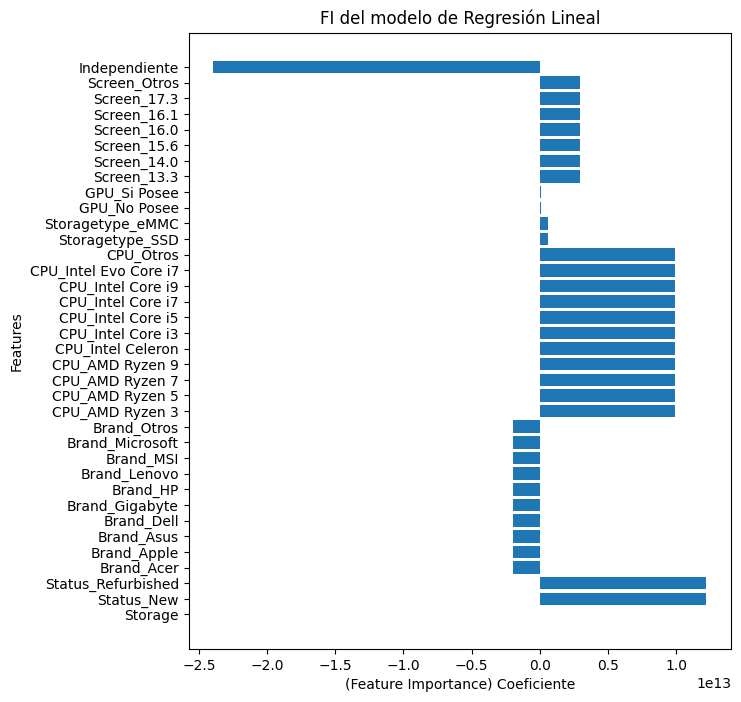

In [ ]:
# visualizamos todos los pesos
coefs = np.copy(reg_lineal.coef_).tolist() + [reg_lineal.intercept_.tolist()]
columns = df_train_cod.copy().drop(columns=['RAM']).columns.values.astype('str').tolist()  + ['Independiente']

# plot
plt.figure(figsize=(7,8))
plt.barh(columns, coefs)
plt.xlabel("(Feature Importance) Coeficiente")
plt.ylabel("Features")
plt.title("FI del modelo de Regresión Lineal")
plt.show()

Las entradas generadas mediante la codificación de categorias han adquirido el mismo coeficiente. Podemos agruparlos nuevamente para facilitar su visualización.

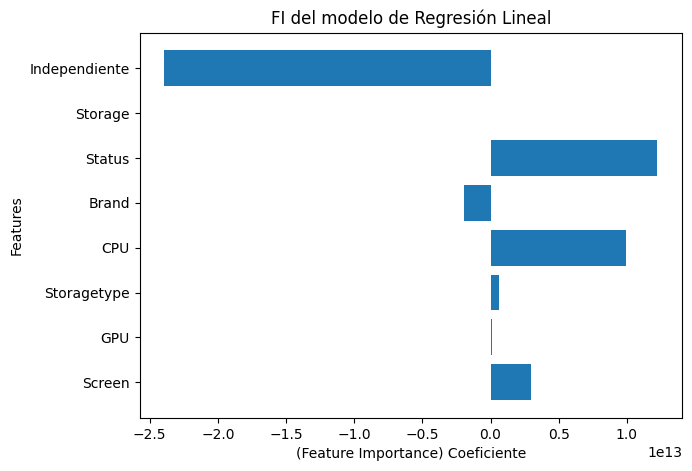

In [ ]:
# visualizamos los pesos
coefs = np.copy(reg_lineal.coef_).tolist() + [reg_lineal.intercept_.tolist()]

# volvemos a agrupar las categorías de los pesos
groups = ['Screen', 'GPU', 'Storagetype', 'CPU', 'Brand', 'Status', 'Storage', 'Independiente']
columns = df_train_cod.copy().drop(columns=['RAM']).columns.values.astype('str').tolist()  + ['Independiente']

columns_tmp = []
coefs_tmp = []
for group in groups:
  grp_inds = np.where(np.char.find(columns, group) != -1)[0]
  coefs_tmp.append(coefs[grp_inds[0]])
  columns_tmp.append(group)

columns = columns_tmp
coefs = coefs_tmp

del columns_tmp
del coefs_tmp

# plot
plt.figure(figsize=(7,5))
plt.barh(columns, coefs)
plt.xlabel("(Feature Importance) Coeficiente")
plt.ylabel("Features")
plt.title("FI del modelo de Regresión Lineal")
plt.show()

Algunos de los coeficientes no se llegan a apreciar correctamente debido a la magnitud de otros.

In [ ]:
print(f'Media\n{np.mean(coefs)}\n')
print(f'Desviación\n{np.std(coefs)}')

Media
0.01171875

Desviación
10211439257383.805


La desviación de los valores de los coeficientes es muy alta. Podemos normalizar la distribución para tener menor desviación.

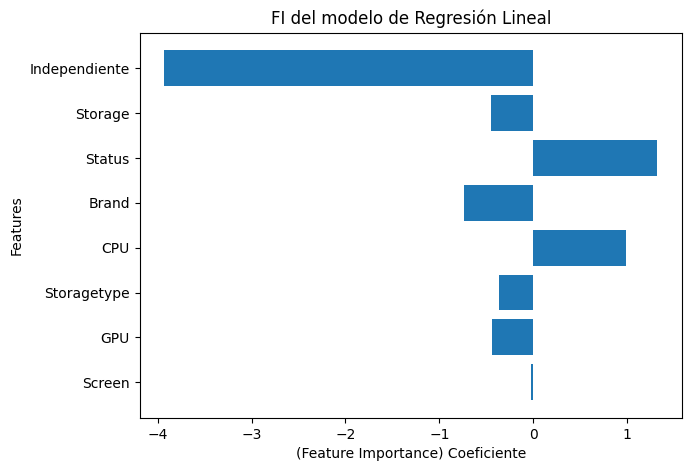

In [ ]:
# escalamos los pesos y los volvemos a visualizar
from sklearn.preprocessing import StandardScaler

# Escalado MinMax
minmax = StandardScaler()
# minmax = MinMaxScaler(feature_range=(-1,1))
coefs = np.copy(reg_lineal.coef_)
coefs = np.concatenate((np.copy(reg_lineal.coef_), np.array([reg_lineal.intercept_])), axis=0)

# ajuste sin el termino independiente
minmax.fit(coefs.reshape(-1,1))

coefs = minmax.transform(coefs.reshape(-1,1))
coefs = coefs.flatten().tolist()
# coefs = coefs + minmax.transform(reg_lineal.intercept_.reshape(-1,1)).tolist()[0]

# volvemos a agrupar las categorías de los pesos
groups = ['Screen', 'GPU', 'Storagetype', 'CPU', 'Brand', 'Status', 'Storage', 'Independiente']
columns = df_train_cod.copy().drop(columns=['RAM']).columns.values.astype('str').tolist()  + ['Independiente']

columns_tmp = []
coefs_tmp = []
for group in groups:
  grp_inds = np.where(np.char.find(columns, group) != -1)[0]
  coefs_tmp.append(coefs[grp_inds[0]])
  columns_tmp.append(group)

columns = columns_tmp
coefs = coefs_tmp

del columns_tmp
del coefs_tmp

# plot
plt.figure(figsize=(7,5))
plt.barh(columns, coefs)
plt.xlabel("(Feature Importance) Coeficiente")
plt.ylabel("Features")
plt.title("FI del modelo de Regresión Lineal")
plt.show()

Para poder visualizar el resultado del ajuste de parámetros, utilizamos gráficos de barras horizontales que nos ayudan a tener una referencia rápida de comparación de valores. A través de estos gráficos hemos podido detectar que:
- Las categorías que fueron codificadas mediante la técnica de OneHot adquirieron el mismo peso, por lo que es posible agruparlas de nuevo en un solo coeficiente de referencia para una mejor interpretación.
- Los pesos han adquirido una magnitud muy alta, lo que lo hace muy sensible e inestable a los valores de las entradas para determinar el resultado de la clasificación. La presencia de coeficientes muy grande también dificulta su interpretación, ya que un mínimo cambio en las entradas supone un efecto extremo de los resultados, por lo que también se vuelve propenso al sobreajuste con los datos de entrenamiento.
- Debido a lo anterior, se decidió por la normalización de los valores de los coeficientes con el fin de lograr una mejor interpretación sin la necesidad de un cambio de modelo.

## 2da Técnica: Redes neuronales

### Ajuste de parámetros

In [ ]:
from sklearn.neural_network import MLPClassifier

datos_tmp = df_train_cod.copy()

y_train = datos_tmp.pop('RAM').to_numpy()
x_train = datos_tmp.to_numpy()

del datos_tmp

red_mlp = MLPClassifier(
    hidden_layer_sizes=(20,20,20),  # cantidad de neuronas por capa oculta
    max_iter=400,                   # maximo numero de iteraciones
    activation='logistic',          # funcion sigmoidal
    alpha=0.001,                    # tasa de aprendizaje
    random_state=17)                # semilla para generar los pesos

red_mlp.fit(x_train, y_train)

print(f'Pesos calculados:\n{red_mlp.coefs_}\n') # los pesos calculados
print(f'Términos independientes:\n{red_mlp.intercepts_}') # el termino independiente del aumento


Pesos calculados:
[array([[ 7.27691896e-01, -8.26869646e-01,  6.86524499e-01,
         6.93931579e-01,  9.75254566e-01,  8.22589707e-01,
         8.70542793e-01,  8.85131689e-01,  6.77042610e-01,
         7.14511863e-01, -7.05208697e-01, -1.06923382e+00,
         9.76714504e-01, -7.30991611e-01,  6.74695500e-01,
         8.33291938e-01, -8.50950739e-01,  8.77571094e-01,
         9.12325584e-01,  7.95015526e-01],
       [-1.28271554e-01,  2.28052665e-02, -1.80376399e-01,
         1.10778494e-01,  1.01753836e-01, -1.22480884e-01,
        -1.82658679e-02, -9.67494591e-02, -9.76965081e-02,
        -2.56659693e-01,  7.64431531e-02, -3.51379835e-02,
         1.32029782e-01, -1.00769106e-01, -6.50638834e-02,
        -1.66777622e-01, -3.67443416e-02,  2.33955432e-02,
        -5.86367401e-03, -2.10432663e-02],
       [-1.04571887e-01, -9.10251406e-02,  2.78408501e-02,
        -8.31804863e-02, -1.26298863e-01, -2.43914308e-02,
         9.32411757e-03, -2.17339276e-01,  1.03484432e-01,
         1

De igual forma que en el clasificador lineal, se procedio a separar la variable objetivo del resto de variables en el set de entrenamiento. Se eligió en este caso como segundo modelo una red neuronal MLP (Perceptrón multicapa) con una funcion de activación sigmoidal (normalmente utilizada para regresión logística)

Lo que hace este algoritmo, es ajustar los pesos de cada entrada de cada una de las neuronas para reducir el error cuadratico entre el valor esperado y el predicho. Cambiando en cada iteracion los pesos realizando backtracking
En este caso la cantidad de capas y la cantidad de neuronas por capa fue elegida de forma arbitraria, tratando de tener un buen numero de neuronas, pero tampoco excedernos en cantidad para evitar el sobreajuste del modelo
El numero de iteraciones tambien fue elegido de forma arbitraria, ya que se considero que con 400 seria suficiente para que la red pueda aprender

### Predicción

In [ ]:
# procesamos los datos de prueba
x_test = df_test_cod.copy().drop(columns=['RAM']).to_numpy()
y_test = df_test_cod.copy().pop('RAM').to_numpy()
y_predict_nn = red_mlp.predict(x_test)

In [ ]:
y_predict_nn

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

Prueba de la red neuronal ya entrenada con los datos de test, con el fin de poder probar luego su precisión en cuando a las predicciones. En este caso el algoritmo arroja valores 0 o 1 como predicción (utilizando por defecto un umbral de 0.5), por lo que no será necesario hacer una transformación de los valores predichos

### Análisis de la importancia de cada característica

In [ ]:
# vemos la cantidad de pesos iniciales de la capa de entrada
print(f'Cantidad de características:\n{len(red_mlp.coefs_[0])}')
print(f'Cantidad de pesos por característica:\n{len(red_mlp.coefs_[0][0])}')

Cantidad de características:
35
Cantidad de pesos por característica:
20


In [ ]:
# vemos la cantida de términos independientes
print(f'Cantidad de términos independientes en la capa de entrada:\n{len(red_mlp.intercepts_[0])}')

Cantidad de términos independientes en la capa de entrada:
20


In [ ]:
def means_stds_capa(ith):
  ith_capa = red_mlp.coefs_[ith-1]

  neuron_means = np.mean(ith_capa, axis=0)
  neuron_stddevs = np.std(ith_capa, axis=0)

  print(f'Neuronas de Capa {ith}')
  for i, (mean, stddev) in enumerate(zip(neuron_means, neuron_stddevs)):
      print(f"Neurona {i + 1}: Media = {mean:.2f}, Desviación Estándar = {stddev:.2f}")

In [ ]:
# media y desviacion capa 1
means_stds_capa(1)

Neuronas de Capa 1
Neurona 1: Media = -0.11, Desviación Estándar = 0.38
Neurona 2: Media = 0.10, Desviación Estándar = 0.46
Neurona 3: Media = -0.08, Desviación Estándar = 0.39
Neurona 4: Media = -0.11, Desviación Estándar = 0.42
Neurona 5: Media = -0.08, Desviación Estándar = 0.48
Neurona 6: Media = -0.10, Desviación Estándar = 0.41
Neurona 7: Media = -0.06, Desviación Estándar = 0.43
Neurona 8: Media = -0.09, Desviación Estándar = 0.44
Neurona 9: Media = -0.09, Desviación Estándar = 0.41
Neurona 10: Media = -0.06, Desviación Estándar = 0.40
Neurona 11: Media = 0.11, Desviación Estándar = 0.42
Neurona 12: Media = 0.02, Desviación Estándar = 0.48
Neurona 13: Media = -0.09, Desviación Estándar = 0.43
Neurona 14: Media = 0.09, Desviación Estándar = 0.43
Neurona 15: Media = -0.10, Desviación Estándar = 0.40
Neurona 16: Media = -0.08, Desviación Estándar = 0.43
Neurona 17: Media = 0.07, Desviación Estándar = 0.45
Neurona 18: Media = -0.07, Desviación Estándar = 0.46
Neurona 19: Media = -0.

In [ ]:
# media y desviacion capa 2
means_stds_capa(2)

Neuronas de Capa 2
Neurona 1: Media = 0.11, Desviación Estándar = 0.36
Neurona 2: Media = 0.12, Desviación Estándar = 0.37
Neurona 3: Media = -0.14, Desviación Estándar = 0.33
Neurona 4: Media = 0.09, Desviación Estándar = 0.31
Neurona 5: Media = 0.12, Desviación Estándar = 0.35
Neurona 6: Media = -0.13, Desviación Estándar = 0.34
Neurona 7: Media = 0.11, Desviación Estándar = 0.34
Neurona 8: Media = -0.17, Desviación Estándar = 0.35
Neurona 9: Media = -0.14, Desviación Estándar = 0.32
Neurona 10: Media = 0.13, Desviación Estándar = 0.34
Neurona 11: Media = 0.12, Desviación Estándar = 0.35
Neurona 12: Media = -0.17, Desviación Estándar = 0.34
Neurona 13: Media = -0.06, Desviación Estándar = 0.27
Neurona 14: Media = -0.21, Desviación Estándar = 0.38
Neurona 15: Media = 0.06, Desviación Estándar = 0.31
Neurona 16: Media = 0.12, Desviación Estándar = 0.36
Neurona 17: Media = 0.09, Desviación Estándar = 0.34
Neurona 18: Media = 0.07, Desviación Estándar = 0.31
Neurona 19: Media = 0.11, Des

In [ ]:
# media y desviacion capa 3
means_stds_capa(3)

Neuronas de Capa 3
Neurona 1: Media = -0.02, Desviación Estándar = 0.33
Neurona 2: Media = 0.04, Desviación Estándar = 0.34
Neurona 3: Media = -0.02, Desviación Estándar = 0.34
Neurona 4: Media = -0.02, Desviación Estándar = 0.34
Neurona 5: Media = -0.01, Desviación Estándar = 0.33
Neurona 6: Media = 0.04, Desviación Estándar = 0.39
Neurona 7: Media = 0.03, Desviación Estándar = 0.34
Neurona 8: Media = -0.03, Desviación Estándar = 0.36
Neurona 9: Media = -0.01, Desviación Estándar = 0.33
Neurona 10: Media = -0.04, Desviación Estándar = 0.35
Neurona 11: Media = 0.02, Desviación Estándar = 0.33
Neurona 12: Media = 0.01, Desviación Estándar = 0.35
Neurona 13: Media = 0.02, Desviación Estándar = 0.35
Neurona 14: Media = 0.03, Desviación Estándar = 0.34
Neurona 15: Media = 0.02, Desviación Estándar = 0.37
Neurona 16: Media = 0.02, Desviación Estándar = 0.34
Neurona 17: Media = 0.01, Desviación Estándar = 0.34
Neurona 18: Media = -0.03, Desviación Estándar = 0.35
Neurona 19: Media = 0.07, De

In [ ]:
# media y desviacion capa salida
means_stds_capa(4)

Neuronas de Capa 4
Neurona 1: Media = -0.01, Desviación Estándar = 0.55


In [ ]:
hidden_layer_weights = red_mlp.coefs_[0]

# Calcula la media y desviación estándar de los pesos de cada neurona en la capa oculta
neuron_means = np.mean(hidden_layer_weights, axis=0)
neuron_stddevs = np.std(hidden_layer_weights, axis=0)

# neuron_means contendrá la media de los pesos de cada neurona
# neuron_stddevs contendrá la desviación estándar de los pesos de cada neurona

# Puedes imprimir los resultados o realizar análisis adicionales
for i, (mean, stddev) in enumerate(zip(neuron_means, neuron_stddevs)):
    print(f"Neurona {i + 1}: Media = {mean:.2f}, Desviación Estándar = {stddev:.2f}")


Neurona 1: Media = -0.11, Desviación Estándar = 0.38
Neurona 2: Media = 0.10, Desviación Estándar = 0.46
Neurona 3: Media = -0.08, Desviación Estándar = 0.39
Neurona 4: Media = -0.11, Desviación Estándar = 0.42
Neurona 5: Media = -0.08, Desviación Estándar = 0.48
Neurona 6: Media = -0.10, Desviación Estándar = 0.41
Neurona 7: Media = -0.06, Desviación Estándar = 0.43
Neurona 8: Media = -0.09, Desviación Estándar = 0.44
Neurona 9: Media = -0.09, Desviación Estándar = 0.41
Neurona 10: Media = -0.06, Desviación Estándar = 0.40
Neurona 11: Media = 0.11, Desviación Estándar = 0.42
Neurona 12: Media = 0.02, Desviación Estándar = 0.48
Neurona 13: Media = -0.09, Desviación Estándar = 0.43
Neurona 14: Media = 0.09, Desviación Estándar = 0.43
Neurona 15: Media = -0.10, Desviación Estándar = 0.40
Neurona 16: Media = -0.08, Desviación Estándar = 0.43
Neurona 17: Media = 0.07, Desviación Estándar = 0.45
Neurona 18: Media = -0.07, Desviación Estándar = 0.46
Neurona 19: Media = -0.12, Desviación Está

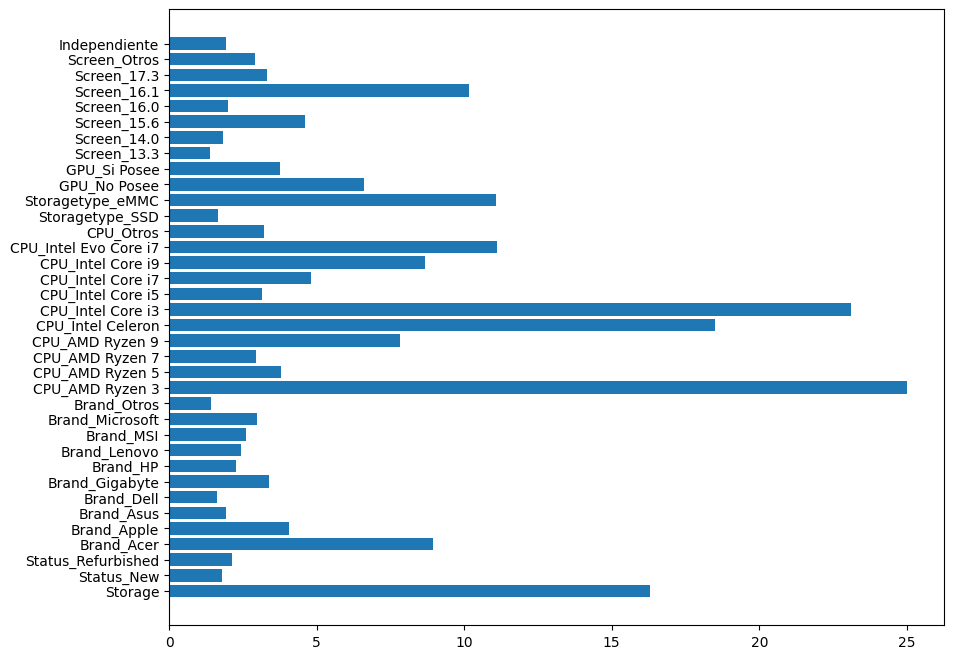

In [ ]:
# hacemos la suma de los absolutos de los pesos para conocer su importancia
weights = red_mlp.coefs_[0]
intercepts = red_mlp.intercepts_[0]

feature_importance = np.abs(weights).sum(axis=1)
feature_importance = np.concatenate([feature_importance, [np.abs(intercepts).sum()]])

columns = df_train_cod.copy().drop(columns=['RAM']).columns.values.tolist()
columns = columns + ['Independiente']

plt.figure(figsize=(10,8))
plt.barh(columns, feature_importance)
plt.show()

El análisis de importancia de características de la red neuronal multicapa `MLPClassifier` resulta ser más dificil de obtener medidas de forma directa como cómo influye cada una de las variables a nuestras salidas. Esto es debido a que un misma dato de característica se conecta a varias entradas de la capa oculta siguiente, lo que lo dá un peso particular por cada una de ellas.

Para trabajar la visualización, se ha decidido realizar la sumatoria de los valores absolutos de los pesos que poseen las las conexión entre la capa de entrada y la primer capa oculta, incluyen al término independiente.

Como resultado, podemos apreciar de que las variables que se obtuvieron de codificar las categorías utilizando OneHot ya no comparten los mismos valores, como sí sucedía utilizando el modelo de regresión lineal.

Podemos ver que los pesos tienen valores con una magnitud mucho menores con respecto al otro modelo, evidenciado en el valor de sus medias y varianzas calculadas de cada entrada a cada neurona de la red. Esto lo hace menos inestable y con mejor capacidad frente a los cambios de valores de entrada.

## Matriz de confusión


In [ ]:
from sklearn.metrics import confusion_matrix

cm_cl = confusion_matrix(y_test, y_predict_cl)
cm_nn = confusion_matrix(y_test, y_predict_nn)
print("Matriz de confusión del clasificador lineal")
print(cm_cl)
print("Matriz de confusión para la red neuronal")
print(cm_nn)

Matriz de confusión del clasificador lineal
[[191  24]
 [ 57 268]]
Matriz de confusión para la red neuronal
[[177  38]
 [ 37 288]]


En esta sección se procedio a generar las matrices de confusion para cada modelo
A simple vista para el primer modelo se puede apreciar que hay una buena cantidad de VP (Verdaderos Positivos) y VN (Verdaderos Negativos) a comparacion de los FP (Falsos Positivos) y FN (Falsos Negativos). En particular estas cantidades son
- VP: 268
- VN: 191
- FP: 24
- FN: 57

Para el segundo modelo se puede apreciar los mismo, aunque en este caso hay un menor número de VP y un mayor número de VN, siendo en particular estas cantidades:
- VP: 288
- VN: 177
- FP: 38
- FN: 37

Otra conclusión que se podria sacar a simple vista es que ambos modelos son medianamente precisos en cuanto al valor predicho al no poseer gran cantidad de FP ni FN

## Accuracy, Precision, Recall, F-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_cl = accuracy_score(y_test, y_predict_cl)
pre_cl = precision_score(y_test, y_predict_cl)
rec_cl = recall_score(y_test, y_predict_cl)
f1_cl = f1_score(y_test, y_predict_cl)

print("Clasificador Lineal")
print("Metricas del test (valoracion del resultado)")
print("Accuracy: ", acc_cl)
print("Precision: ", pre_cl)
print("Recall: ", rec_cl)
print("F1 Score: ", f1_cl)

y_predict_train_cl = (reg_lineal.predict(x_train) >= 0.5).astype(int)
acc_cl_train = accuracy_score(y_train, y_predict_train_cl)
pre_cl_train = precision_score(y_train, y_predict_train_cl)
rec_cl_train = recall_score(y_train, y_predict_train_cl)
f1_cl_train = f1_score(y_train, y_predict_train_cl)

print()
print("Metricas con los datos de entrenamiento")
print("Accuracy: ", acc_cl_train)
print("Precision: ", pre_cl_train)
print("Recall: ", rec_cl_train)
print("F1 Score: ", f1_cl_train)

Clasificador Lineal
Metricas del test (valoracion del resultado)
Accuracy:  0.85
Precision:  0.9178082191780822
Recall:  0.8246153846153846
F1 Score:  0.8687196110210698

Metricas con los datos de entrenamiento
Accuracy:  0.8611111111111112
Precision:  0.9058553386911596
Recall:  0.8465665236051502
F1 Score:  0.8752079866888518


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc_nn = accuracy_score(y_test, y_predict_nn)
pre_nn = precision_score(y_test, y_predict_nn)
rec_nn = recall_score(y_test, y_predict_nn)
f1_nn = f1_score(y_test, y_predict_nn)

print("Red Neuronal")
print("Metricas del test (valoracion del resultado)")
print("Accuracy: ", acc_nn)
print("Precision: ", pre_nn)
print("Recall: ", rec_nn)
print("F1 Score: ", f1_nn)

y_predict_train_nn = red_mlp.predict(x_train)
acc_nn_train = accuracy_score(y_train, y_predict_train_nn)
pre_nn_train = precision_score(y_train, y_predict_train_nn)
rec_nn_train = recall_score(y_train, y_predict_train_nn)
f1_nn_train = f1_score(y_train, y_predict_train_nn)

print()
print("Metricas con los datos de entrenamiento")
print("Accuracy: ", acc_nn_train)
print("Precision: ", pre_nn_train)
print("Recall: ", rec_nn_train)
print("F1 Score: ", f1_nn_train)

Red Neuronal
Metricas del test (valoracion del resultado)
Accuracy:  0.8611111111111112
Precision:  0.8834355828220859
Recall:  0.8861538461538462
F1 Score:  0.8847926267281107

Metricas con los datos de entrenamiento
Accuracy:  0.8820987654320988
Precision:  0.8855359001040582
Recall:  0.9130901287553648
F1 Score:  0.8991019545694664


Para ambos modelos, se puede apreciar que se posee un Accuracy, Precision, Recall y F1 Score mayores a 0.8, por lo que se podría afirmar los modelos son fiables y que poseen una cantidad alta de VP y VN y una cantidad mas baja de FP y FN. En particular el segundo modelo posee mayores valores en cada métrica a excepcion de la precisión, lo que quiere decir que el segundo modelo posee una menor tasa de VP en relacion a los FP, o sea que tiende en mayor medida a clasificar los datos como "menor 16 de RAM" aunque no sea realmente el caso

Se analizaron tambien las metricas correspondientes a los datos del conjunto de entrenamiento, con el fin de verificar que no haya un sobreajuste. Para ambos modelos se puede ver que tal sobrejuaste no existe o no es apreciable, ya que las metricas correspondientes al conjunto de entrenamiento se asemejan mucho a las metricas del conjunto de test

## Curva ROC

Curva ROC para el clasificador lineal

In [ ]:
def vpr_fpr_umbrales_cl(x_test, y_test, umbral):
  y_predict_umbral = (reg_lineal.predict(x_test) >= umbral).astype(int)
  confusion_matrix(y_test, y_predict_umbral)
  vpr = recall_score(y_test, y_predict_umbral)

  # Calcula la matriz de confusión
  confusion = confusion_matrix(y_test, y_predict_umbral)

  # Calcula la tasa de falsos positivos (FPR)
  fpr = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])
  return vpr, fpr


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

umbrales = np.linspace(0, 1, 40)
vpru_nn = np.zeros(len(umbrales))
fpru_nn = np.zeros(len(umbrales))
for i in range(len(umbrales)):
  vpru_nn[i], fpru_nn[i] = vpr_fpr_umbrales_cl(x_test, y_test, umbrales[i])

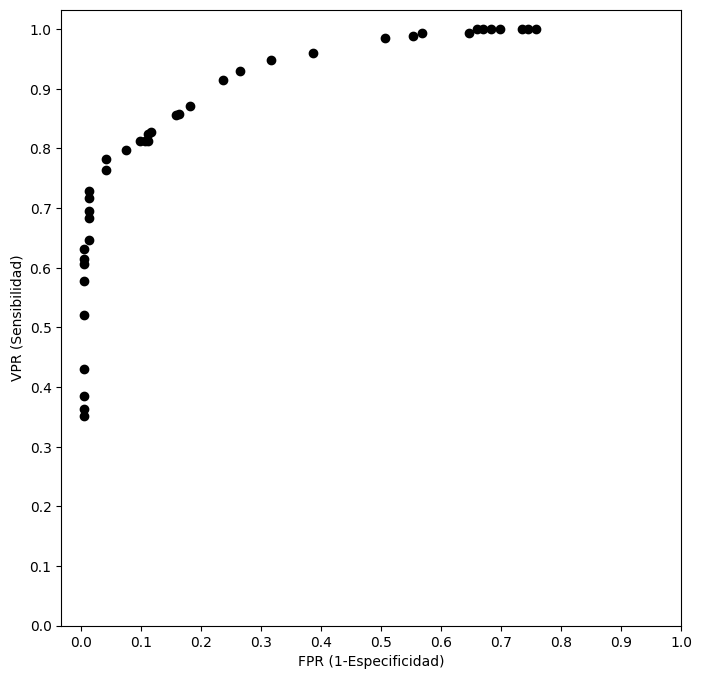

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(len(umbrales)):
    plt.scatter(fpru_nn[i], vpru_nn[i], color='k')
plt.xticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('FPR (1-Especificidad)')
plt.ylabel('VPR (Sensibilidad)')
plt.show()

Curva ROC para la red neuronal

In [ ]:
def vpr_fpr_umbrales_nn(x_test, y_test, umbral):
  y_predict_umbral = (red_mlp.predict_proba(x_test)[:, 1] > umbral).astype(int)
  confusion_matrix(y_test, y_predict_umbral)
  vpr = recall_score(y_test, y_predict_umbral)

  # Calcula la matriz de confusión
  confusion = confusion_matrix(y_test, y_predict_umbral)

  # Calcula la tasa de falsos positivos (FPR)
  fpr = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])
  return vpr, fpr


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

umbrales = np.linspace(0, 1, 40)
vpru_nn = np.zeros(len(umbrales))
fpru_nn = np.zeros(len(umbrales))
for i in range(len(umbrales)):
  vpru_nn[i], fpru_nn[i] = vpr_fpr_umbrales_nn(x_test, y_test, umbrales[i])

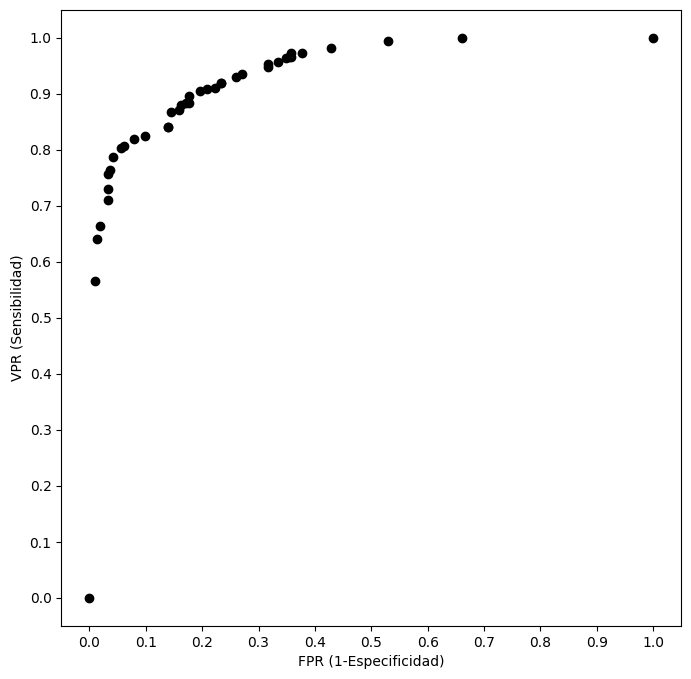

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(len(umbrales)):
    plt.scatter(fpru_nn[i], vpru_nn[i], color='k')

plt.xticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('FPR (1-Especificidad)')
plt.ylabel('VPR (Sensibilidad)')
plt.show()

Se utilizaron 40 umbrales entre 0 y 1 para las curvas ROC de cada *modelo*. Dicho numero se eligió para una granularidad de evaluacion que nos permita hacer una representacion lo suficientemente precisa y coherente entre modelos.

Podemos ver que el modelo basado en red neuronal multicapa ha tenido un mejor rendimiento a la hora de discriminar entre casos positivos y negativos. Esto podemos deducirlo en que, a un FPR muy bajo, obtiene una sensibilidad o VPR relativamente más altos en la curva.

# Conclusiones

Como conclusion para el clasificador lineal podemos observar que las variables que mas peso tienen a la hora de clasificar
ya sea por 1 o 0, son la de "status" y "cpu". Esas variables toman mayor peso a la hora de decidir si la notebook tiene o no 16HB de ram o mas.

En base a lo devuelto por cada modelo haciendo una comparativa entre sus respectivas metricas y curvas ROC podemos
afirmar que el mejor modelo para analizar esta problematica es el de la red neuronal multicapa ya que es la que proporciona mejores resultados a la hora de hacer la prediccion